<a href="https://colab.research.google.com/github/NainaniJatinZ/Hack_Inversion-SIH/blob/main/Notebooks/DataPreprocessing/data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from matplotlib.pyplot import figure
import pandas as pd
# import yfinance
# from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import time
from datetime import datetime
import math

In [ ]:
!pip install mpl_finance

In [ ]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def sma(data_series, window_size):
  windows = data_series.rolling(window_size)
  moving_averages = windows.mean()
  moving_averages_list = moving_averages.tolist()
  without_nans = moving_averages_list[window_size - 1:]
  # return without_nans
  moving_averages_list = [0 if math.isnan(x) else x for x in moving_averages_list]
  return moving_averages_list

def calculate_ema(prices, window_size, smoothing=2):
    ema = [sum(prices[:window_size]) / window_size]
    for price in prices[window_size:]:
        ema.append((price * (smoothing / (1 + window_size))) + ema[-1] * (1 - (smoothing / (1 + window_size))))
    # print(len(ema))
    
    emaList = [0 for i in range(window_size-1)]
    emaList = [y for x in [emaList, ema] for y in x]
    # emaList = emaList + ema
    return emaList

def plotWithDate(date_series, multipleVals):
  x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in date_series]
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
  plt.gca().xaxis.set_major_locator(mdates.DayLocator())
  for y in multipleVals:
    plt.plot(x,y)

In [ ]:
nasd = pd.read_csv("/content/drive/MyDrive/SIH- Hack Inversion/Coding/Nasdaq-Data/HistoricalData_1647105920677.csv")
nasd.head()

Date  Close/Last    Volume   Open   High    Low
0  03/11/2022       4.725   77808.0  4.657  4.797  4.622
1  03/10/2022       4.631   75295.0  4.520  4.671  4.499
2  03/09/2022       4.526   87262.0  4.569  4.625  4.450
3  03/08/2022       4.527  152372.0  4.818  4.882  4.507
4  03/07/2022       4.833  125430.0  5.041  5.184  4.781

In [ ]:
nasd['Date'] =  pd.to_datetime(nasd['Date'], format='%m/%d/%Y')

In [ ]:
nasd.rename(columns = {'Close/Last':'Close'}, inplace = True)

In [ ]:
ema = calculate_ema(nasd['Close'], 21*7)
len(ema)

2554

In [ ]:
ema

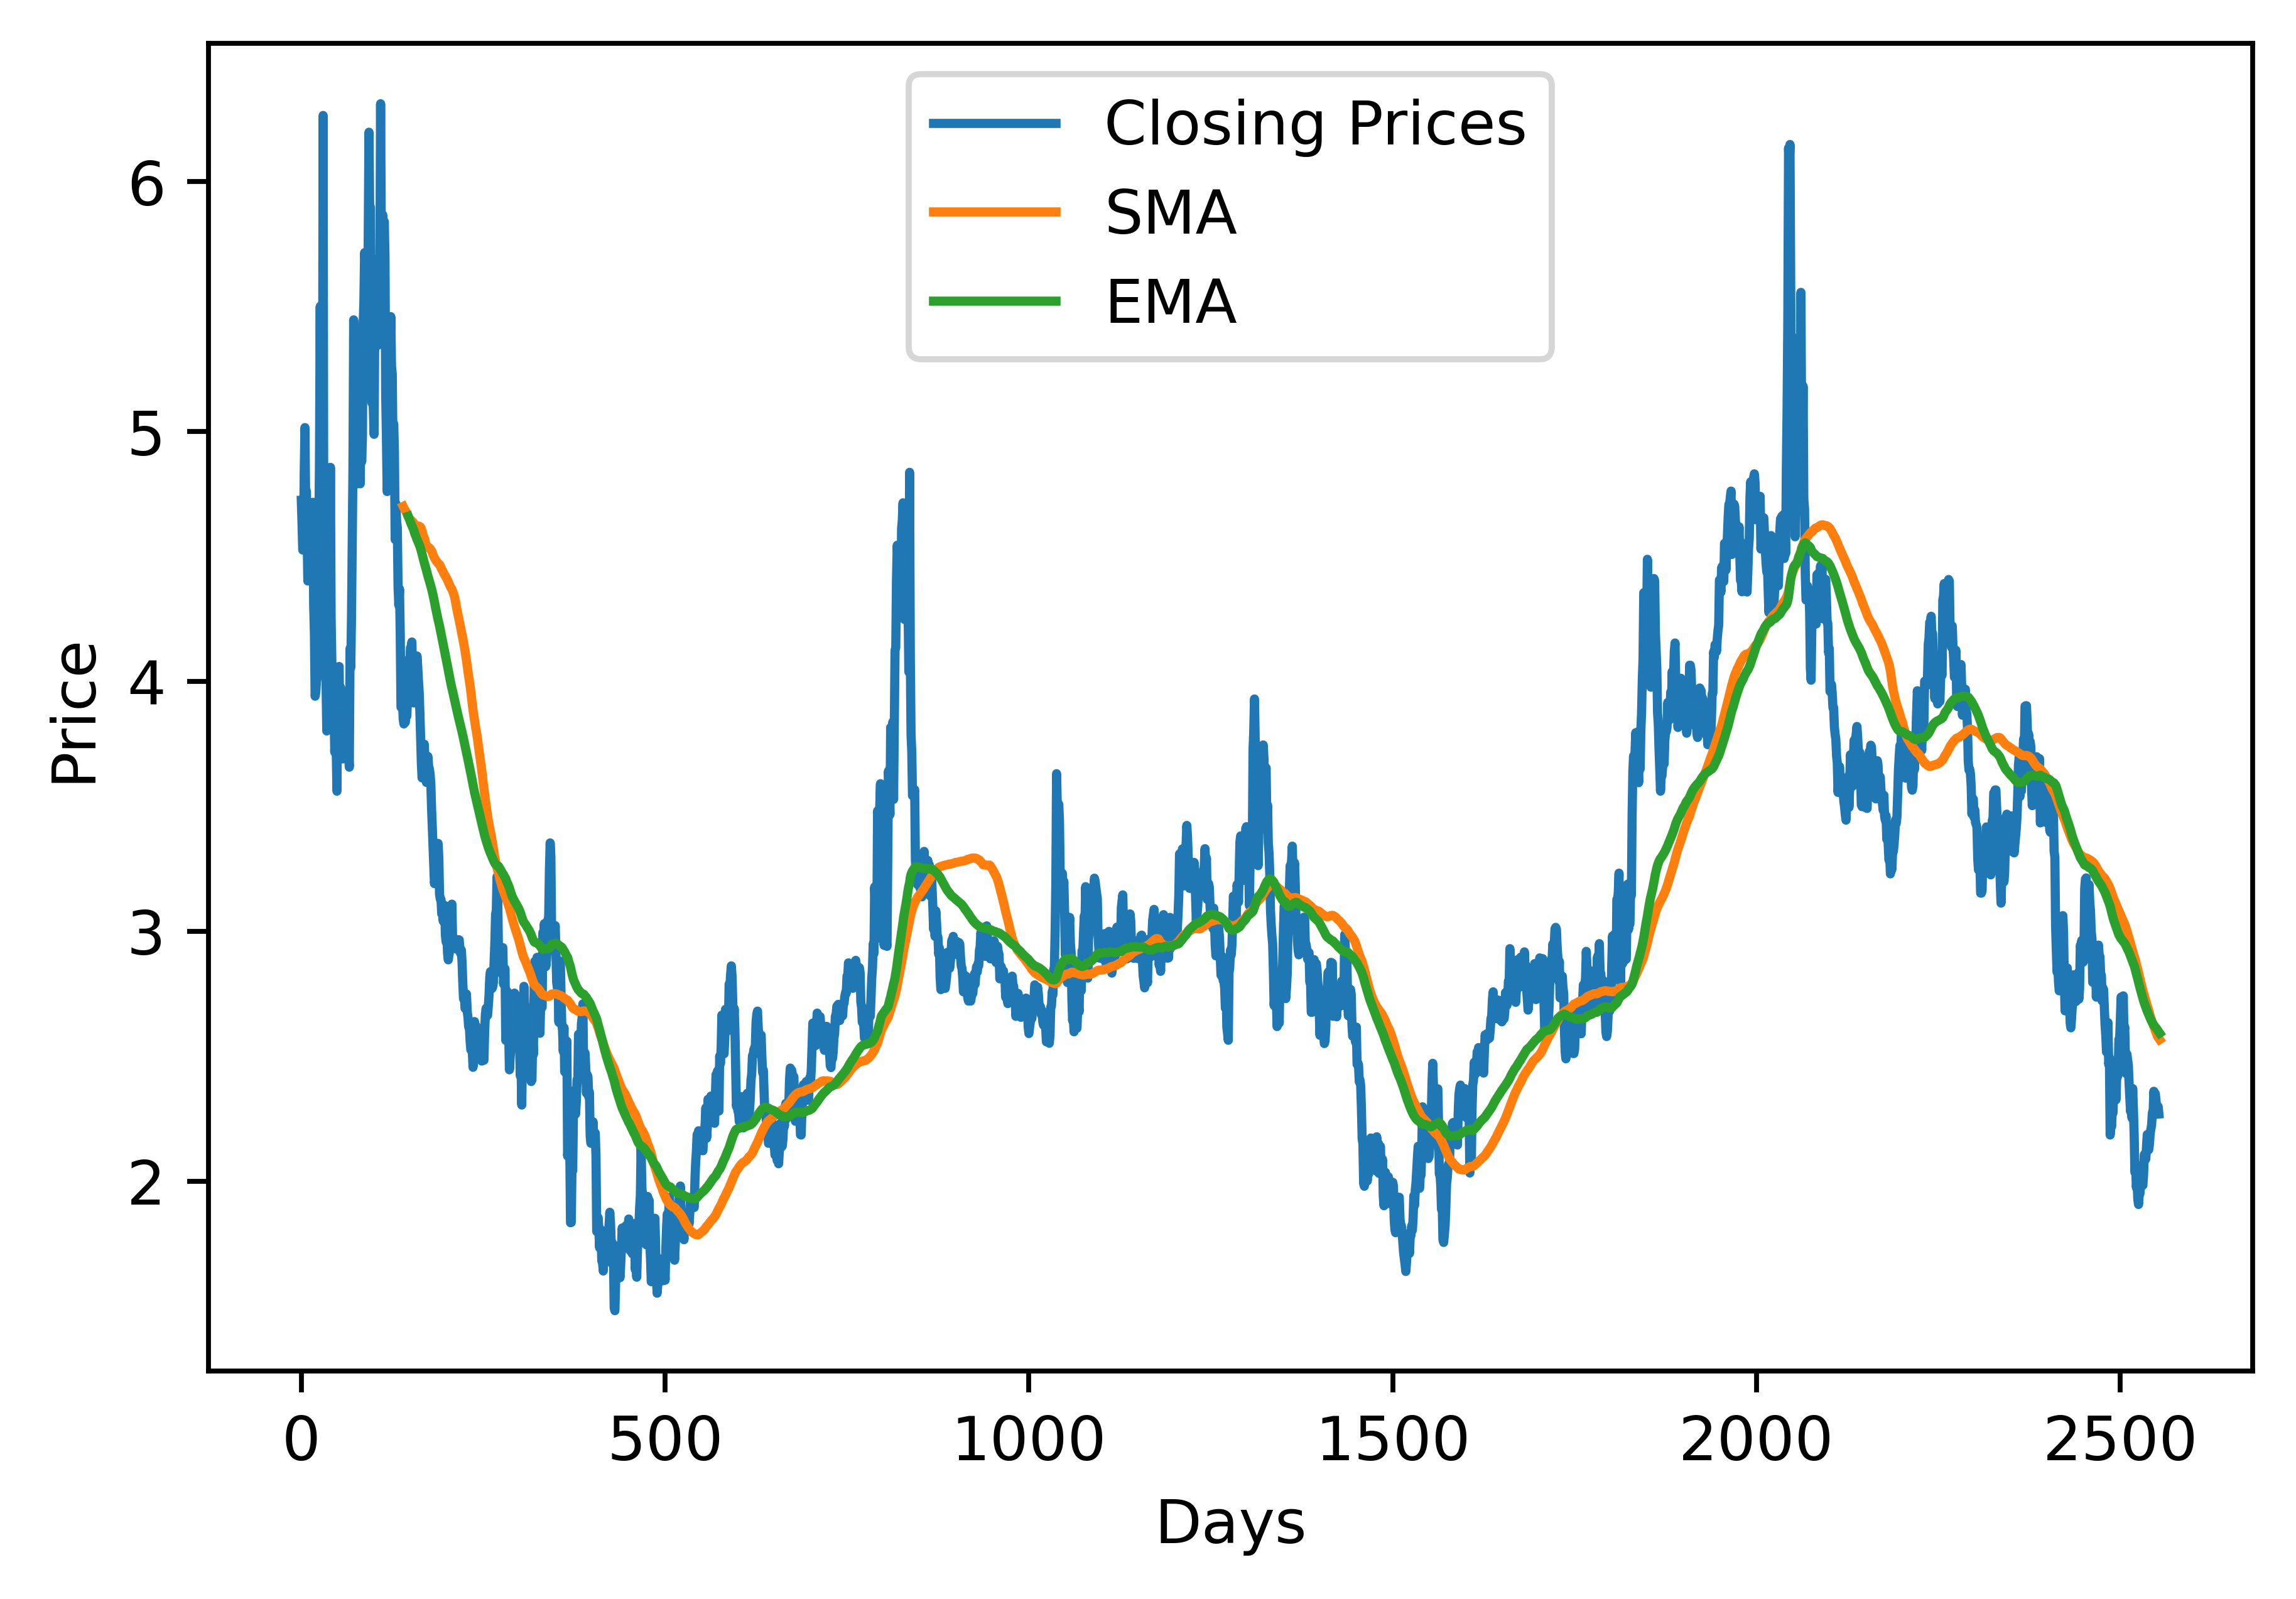

In [ ]:

plt.figure(dpi=700)
ma = sma(nasd['Close'], 20*7)
ema = calculate_ema(nasd['Close'], 21*7)
conc = [ma, ema]
x = np.arange(nasd.shape[0])
x_sma = np.arange(20*7, nasd.shape[0]+1) 
x_ema = np.arange(21*7, nasd.shape[0]+1) 
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(x, nasd['Close'], label='Closing Prices')
plt.plot(x_sma, conc[0], label='SMA')
plt.plot(x_ema, conc[1], label='EMA')
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
# plt.plot(nasd['Date'], nasd['Close'])
# plt.plot(nasd['Date'], conc[0], label='SMA')
# plt.plot(nasd['Date'], conc[1], label='EMA')
# plt.gcf().autofmt_xdate()
# plt.show()
# plt.fill_between(x_ema, conc[0], conc[1], alpha=0.2)  
plt.legend()
plt.show()

In [ ]:
# macd = 12day ema - 26 day ema 

# MACD


In [ ]:
ema1 = calculate_ema(nasd['Close'], 12*7)
ema2 = calculate_ema(nasd['Close'], 26*7)
# len(ema1)
what = list()
for i in range(len(ema1)):
  what.append(ema1[i] - ema2[i])

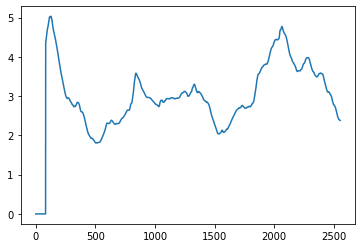

In [ ]:
plt.plot(ema1)

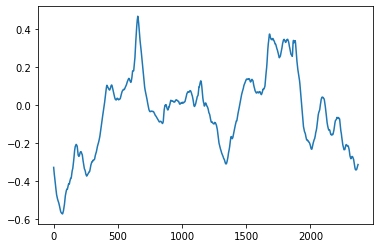

In [ ]:
plt.plot(what[182:])

In [ ]:
nasd.iloc[1613]

Date      2015-10-19 00:00:00
Close                   2.442
Volume                87101.0
Open                    2.464
High                    2.481
Low                     2.435
Name: 1613, dtype: object

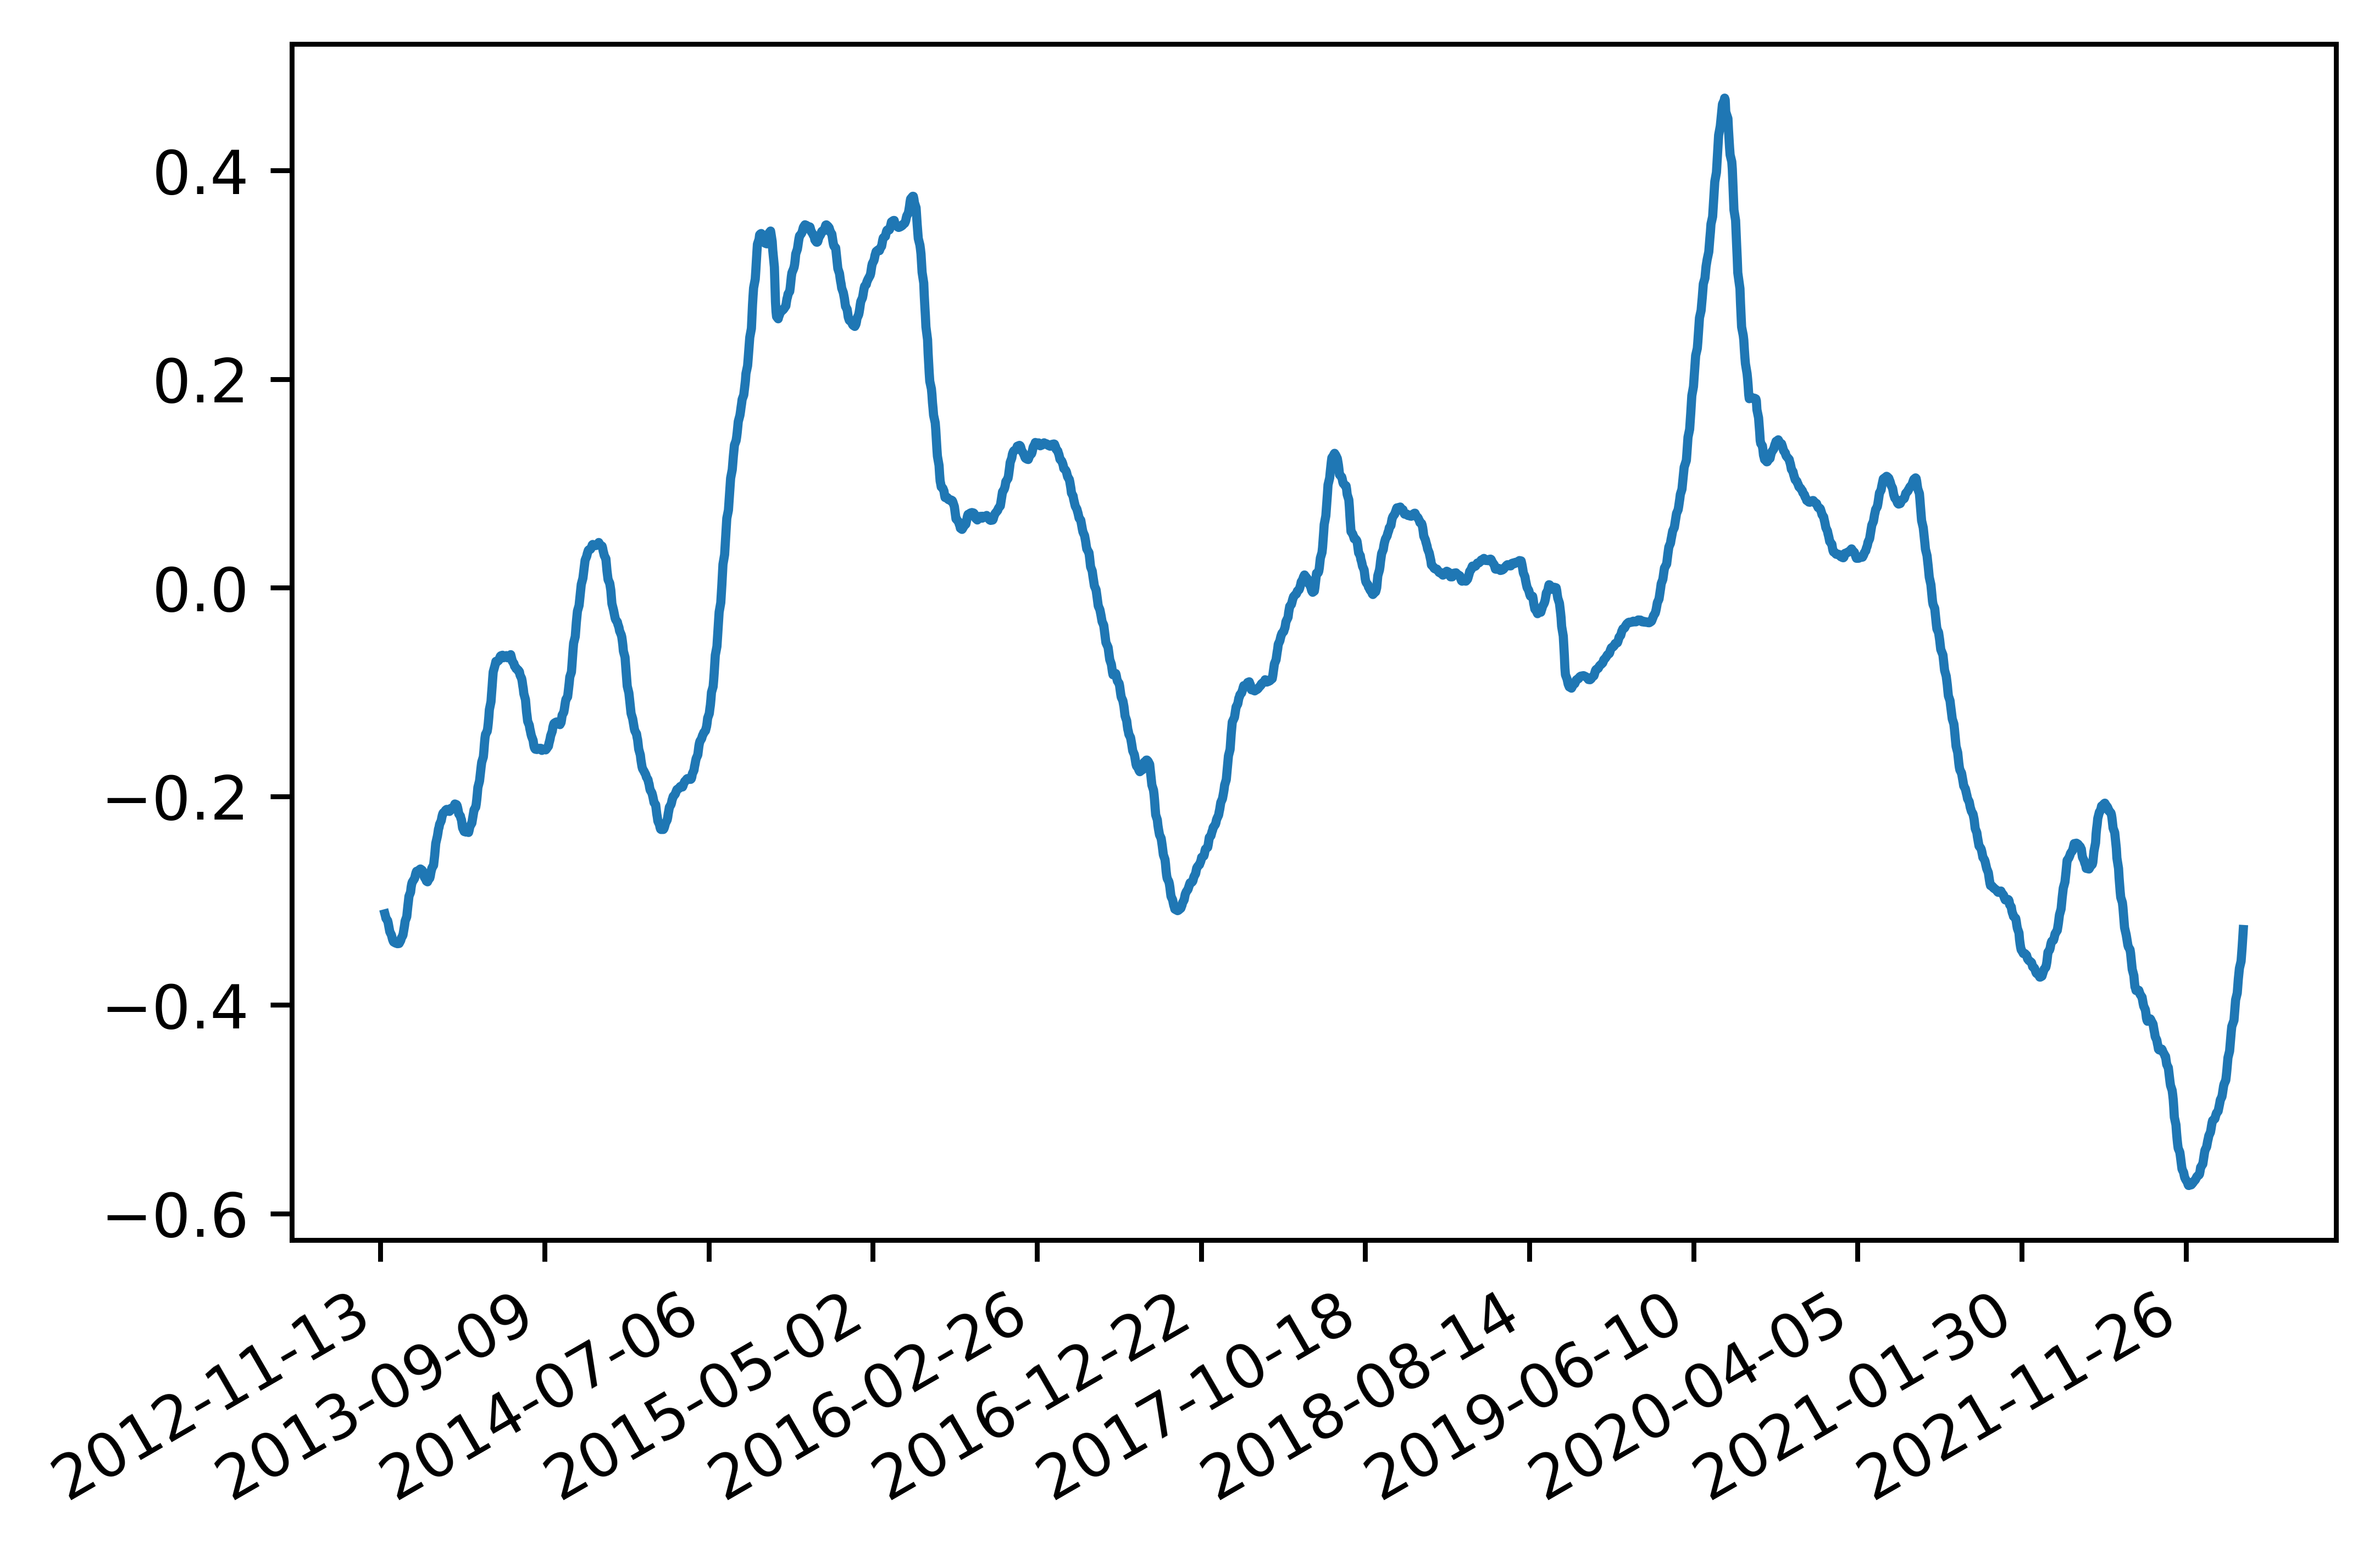

In [ ]:
plt.figure(dpi=800)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))
plt.plot(nasd['Date'][0:-182], what[182:])
plt.gcf().autofmt_xdate()
plt.show()

# Heiken

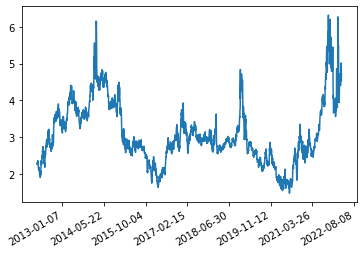

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

# days = mdates.drange(now,then,dt.timedelta(days=1))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.plot(nasd['Date'], nasd['Close'])
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
def plot_chart(df, plotlabel):
  plt.figure(dpi=600) 
  f1 = plt.subplot2grid((6, 4), (1, 0), rowspan=6, colspan=4) #axisbg='#07000d')
  candlestick_ohlc(f1, df.values, width=.6, colorup='#53c156', colordown='#ff1717')
  f1.xaxis_date()
  f1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
  plt.xticks(rotation=45)
  plt.ylabel('Prices')
  plt.xlabel('Date Hours')
  plt.title(plotlabel)
  plt.show()

def heikinAshi(df):
  df_ha = df.copy()
  for i in range(df_ha.shape[0]):
    if i > 0:
      df_ha.loc[df_ha.index[i],'Open'] = (df['Open'][df.index[i]-1] + df['Close'][df.index[i]-1])/2
    
    df_ha.loc[df_ha.index[i],'Close'] = (df['Open'][df.index[i]] + df['Close'][df.index[i]] + df['Low'][df.index[i]] +  df['High'][df.index[i]])/4
  df_ha = df_ha.iloc[1:,:]
  return df_ha

def getWindowDf(df, startdate, enddate):
  mask = (df.Date > startdate ) & (df.Date <= enddate)
  df_smol = df.loc[mask]
  df_smol.Date = pd.to_datetime(df.Date)

  df1 = df_smol[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
  df1["Date"] = df1["Date"].apply(mdates.date2num)
  return df1

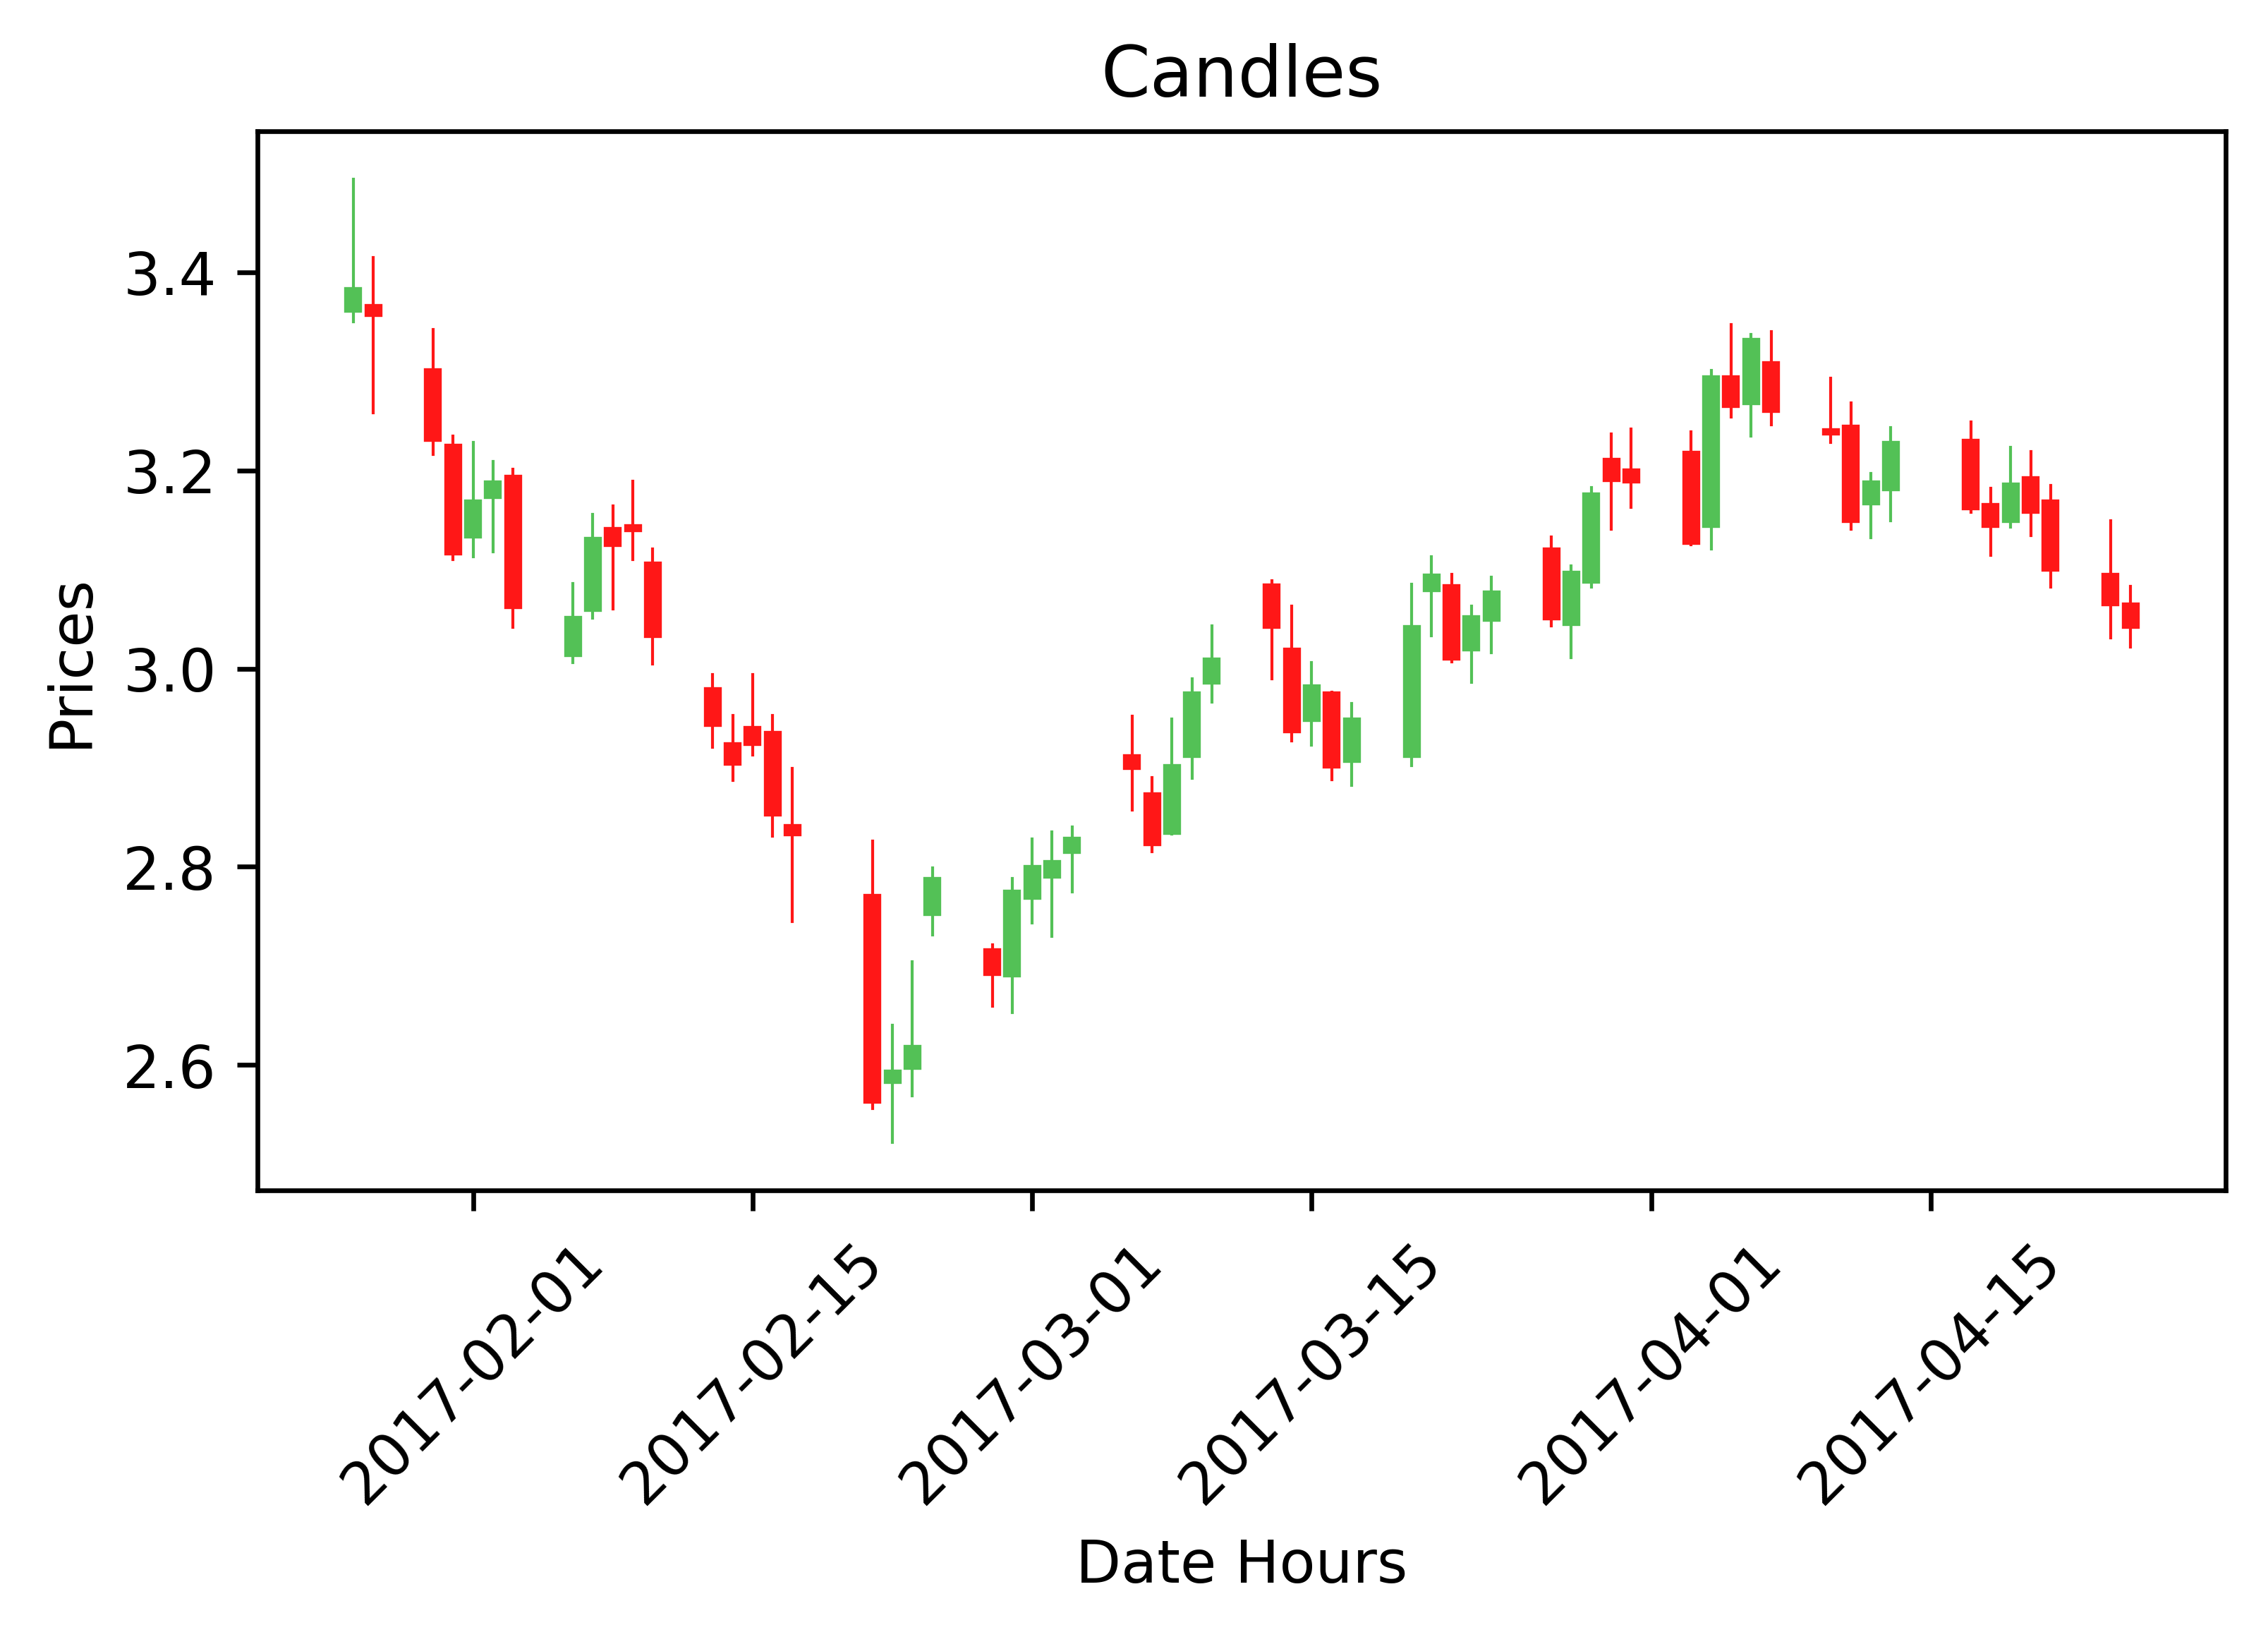

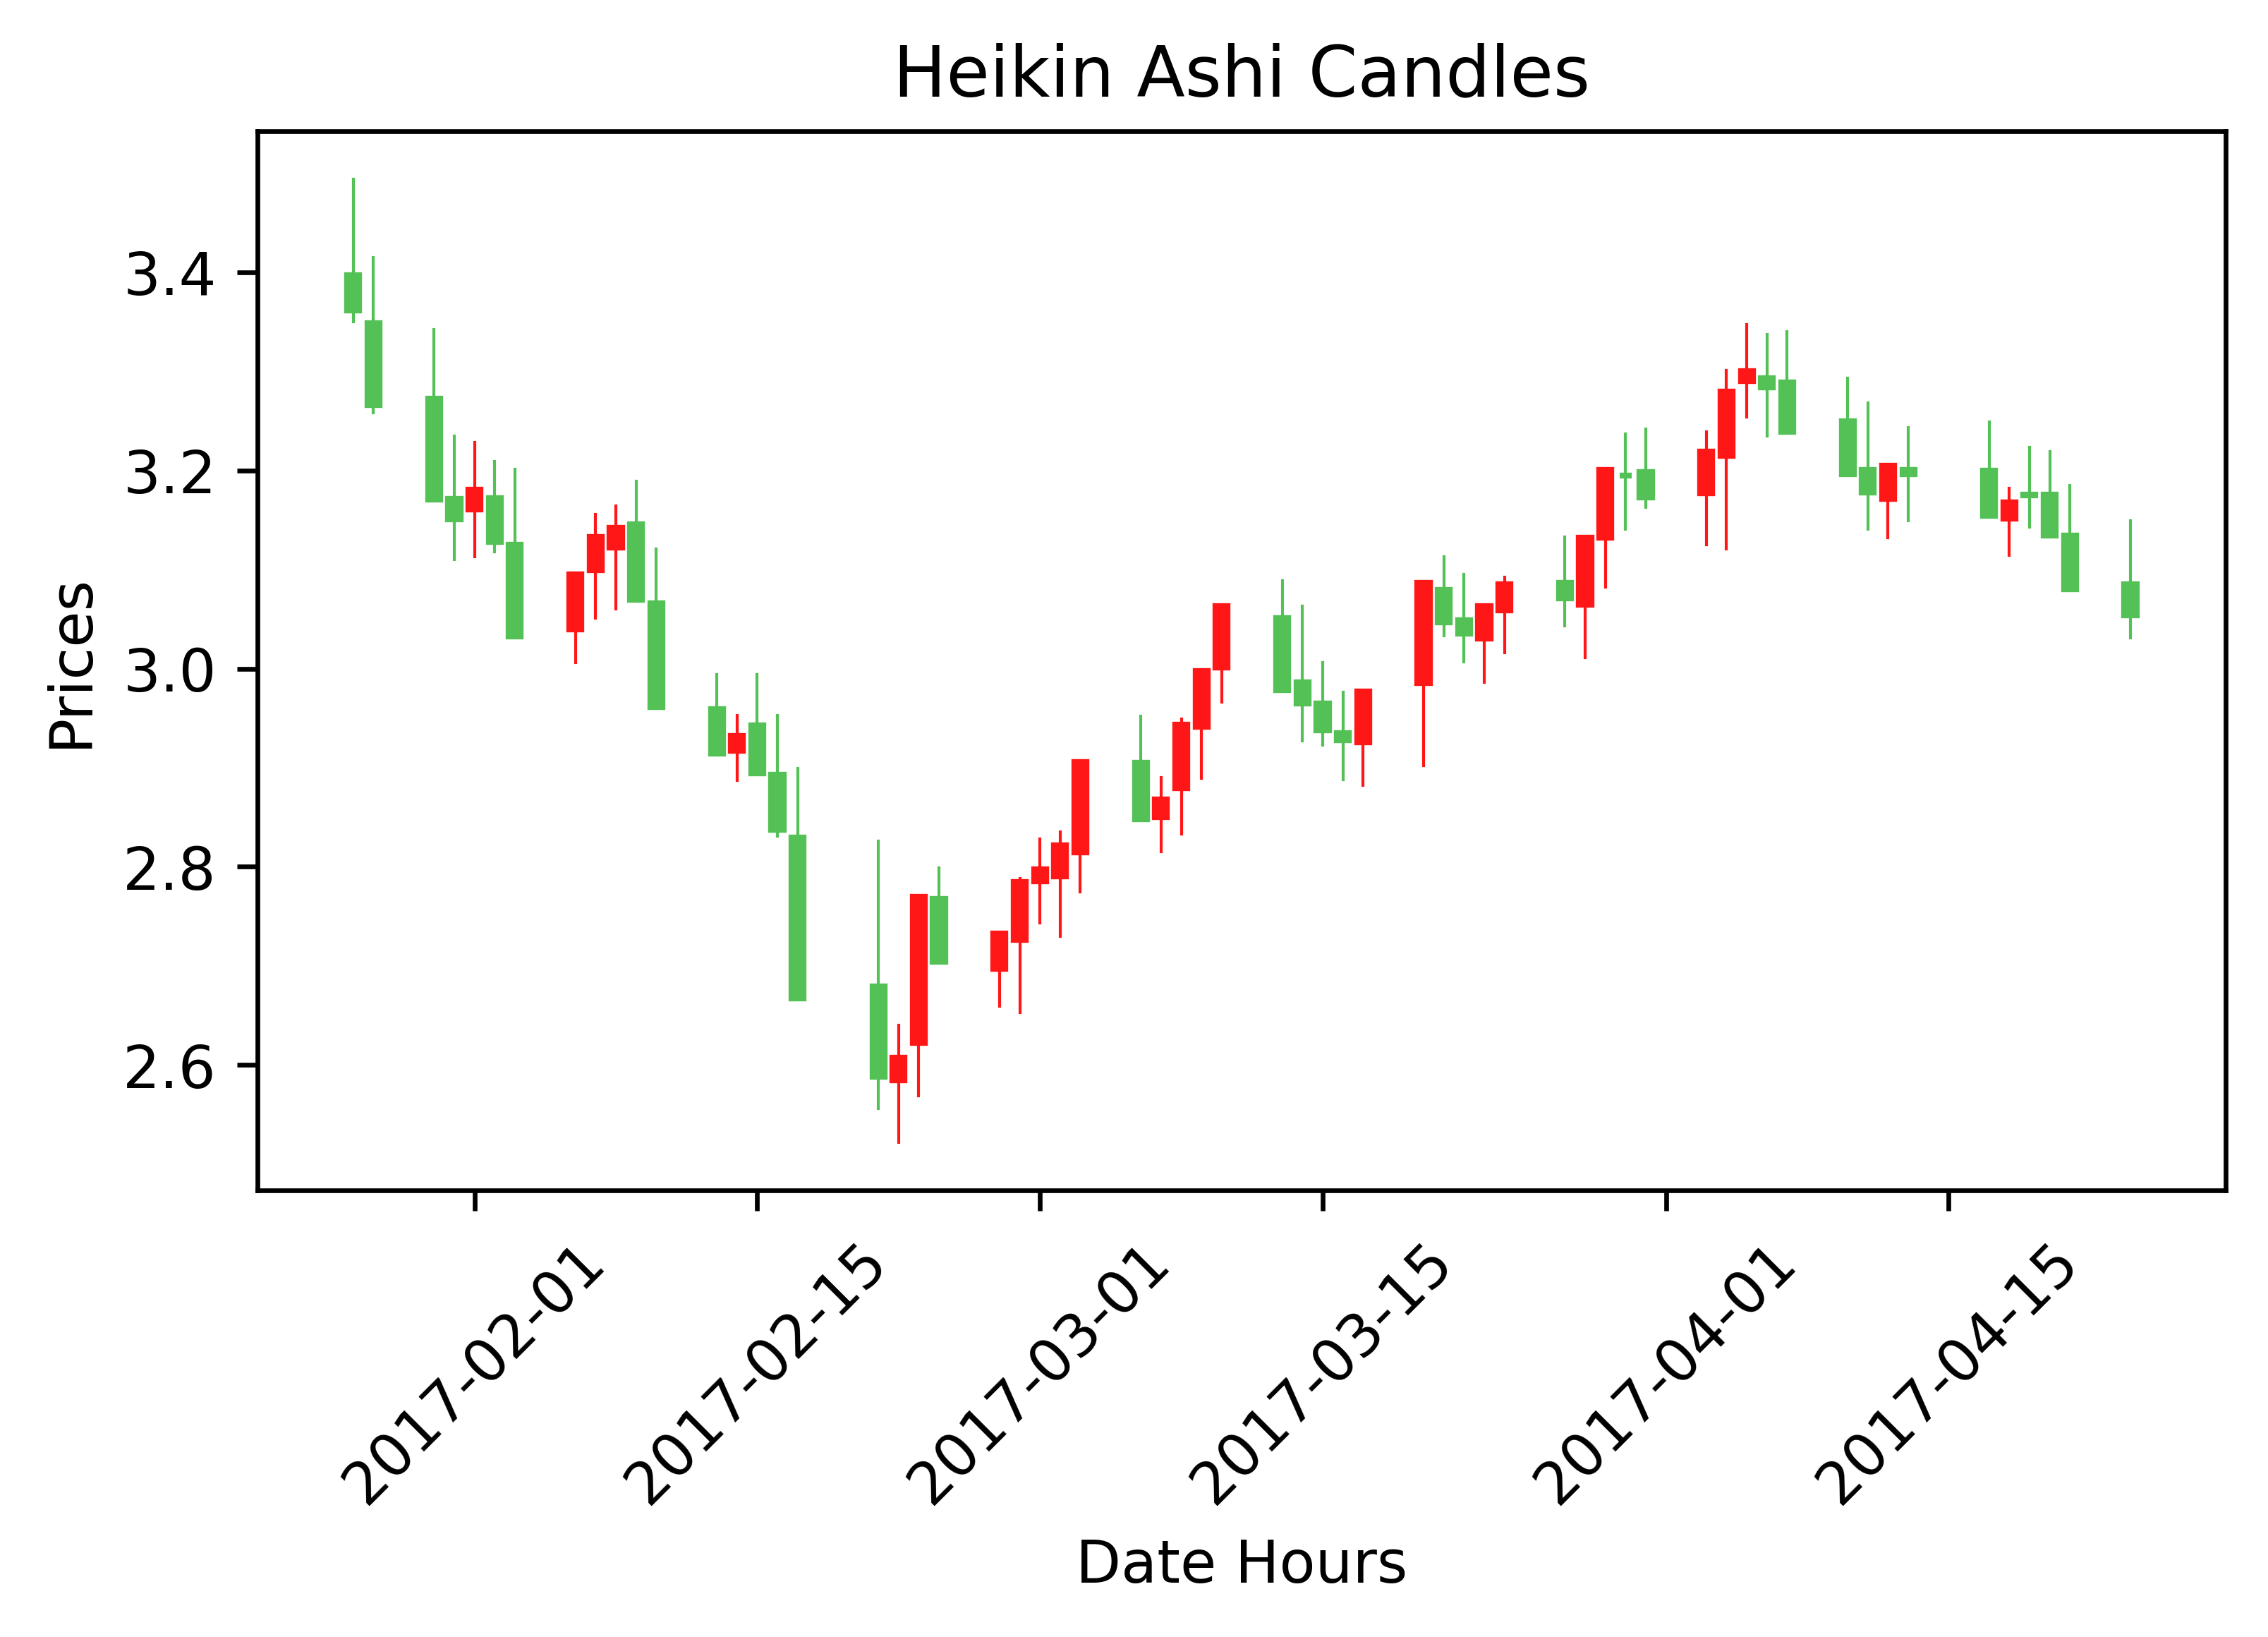

In [ ]:
windows = getWindowDf(nasd, '2017-01-25', '2017-04-25')
windows_ha = heikinAshi(windows)
plot_chart(windows, "Candles")
plot_chart(windows_ha, "Heikin Ashi Candles")

# RSI

In [ ]:
def RSIfun(price, n=14):
    delta = price['Close'].diff()
    #-----------
    dUp, dDown = delta.copy(), delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0

    RolUp = dUp.rolling(n).mean()
    RolDown = dDown.rolling(n).mean().abs()

    RS = RolUp / RolDown

    RolUp=dUp.rolling(n).mean()
    RolDown=dDown.rolling(n).mean().abs()

    RS = RolUp / RolDown
    rsi= 100.0 - (100.0 / (1.0 + RS))
    return rsi

In [ ]:
rsi_new = RSIfun(nasd, n=14*7)
len(rsi_new)

2554

In [ ]:
nasd.head(1500)

Date  Close    Volume   Open   High    Low
0    2022-03-11  4.725   77808.0  4.657  4.797  4.622
1    2022-03-10  4.631   75295.0  4.520  4.671  4.499
2    2022-03-09  4.526   87262.0  4.569  4.625  4.450
3    2022-03-08  4.527  152372.0  4.818  4.882  4.507
4    2022-03-07  4.833  125430.0  5.041  5.184  4.781
...         ...    ...       ...    ...    ...    ...
1495 2016-04-06  1.911  106423.0  1.941  1.943  1.897
1496 2016-04-05  1.954  127192.0  2.004  2.041  1.931
1497 2016-04-04  1.998  150011.0  2.001  2.074  1.976
1498 2016-04-01  1.956  103910.0  1.963  1.992  1.925
1499 2016-03-31  1.959  177678.0  1.990  2.028  1.930

[1500 rows x 6 columns]

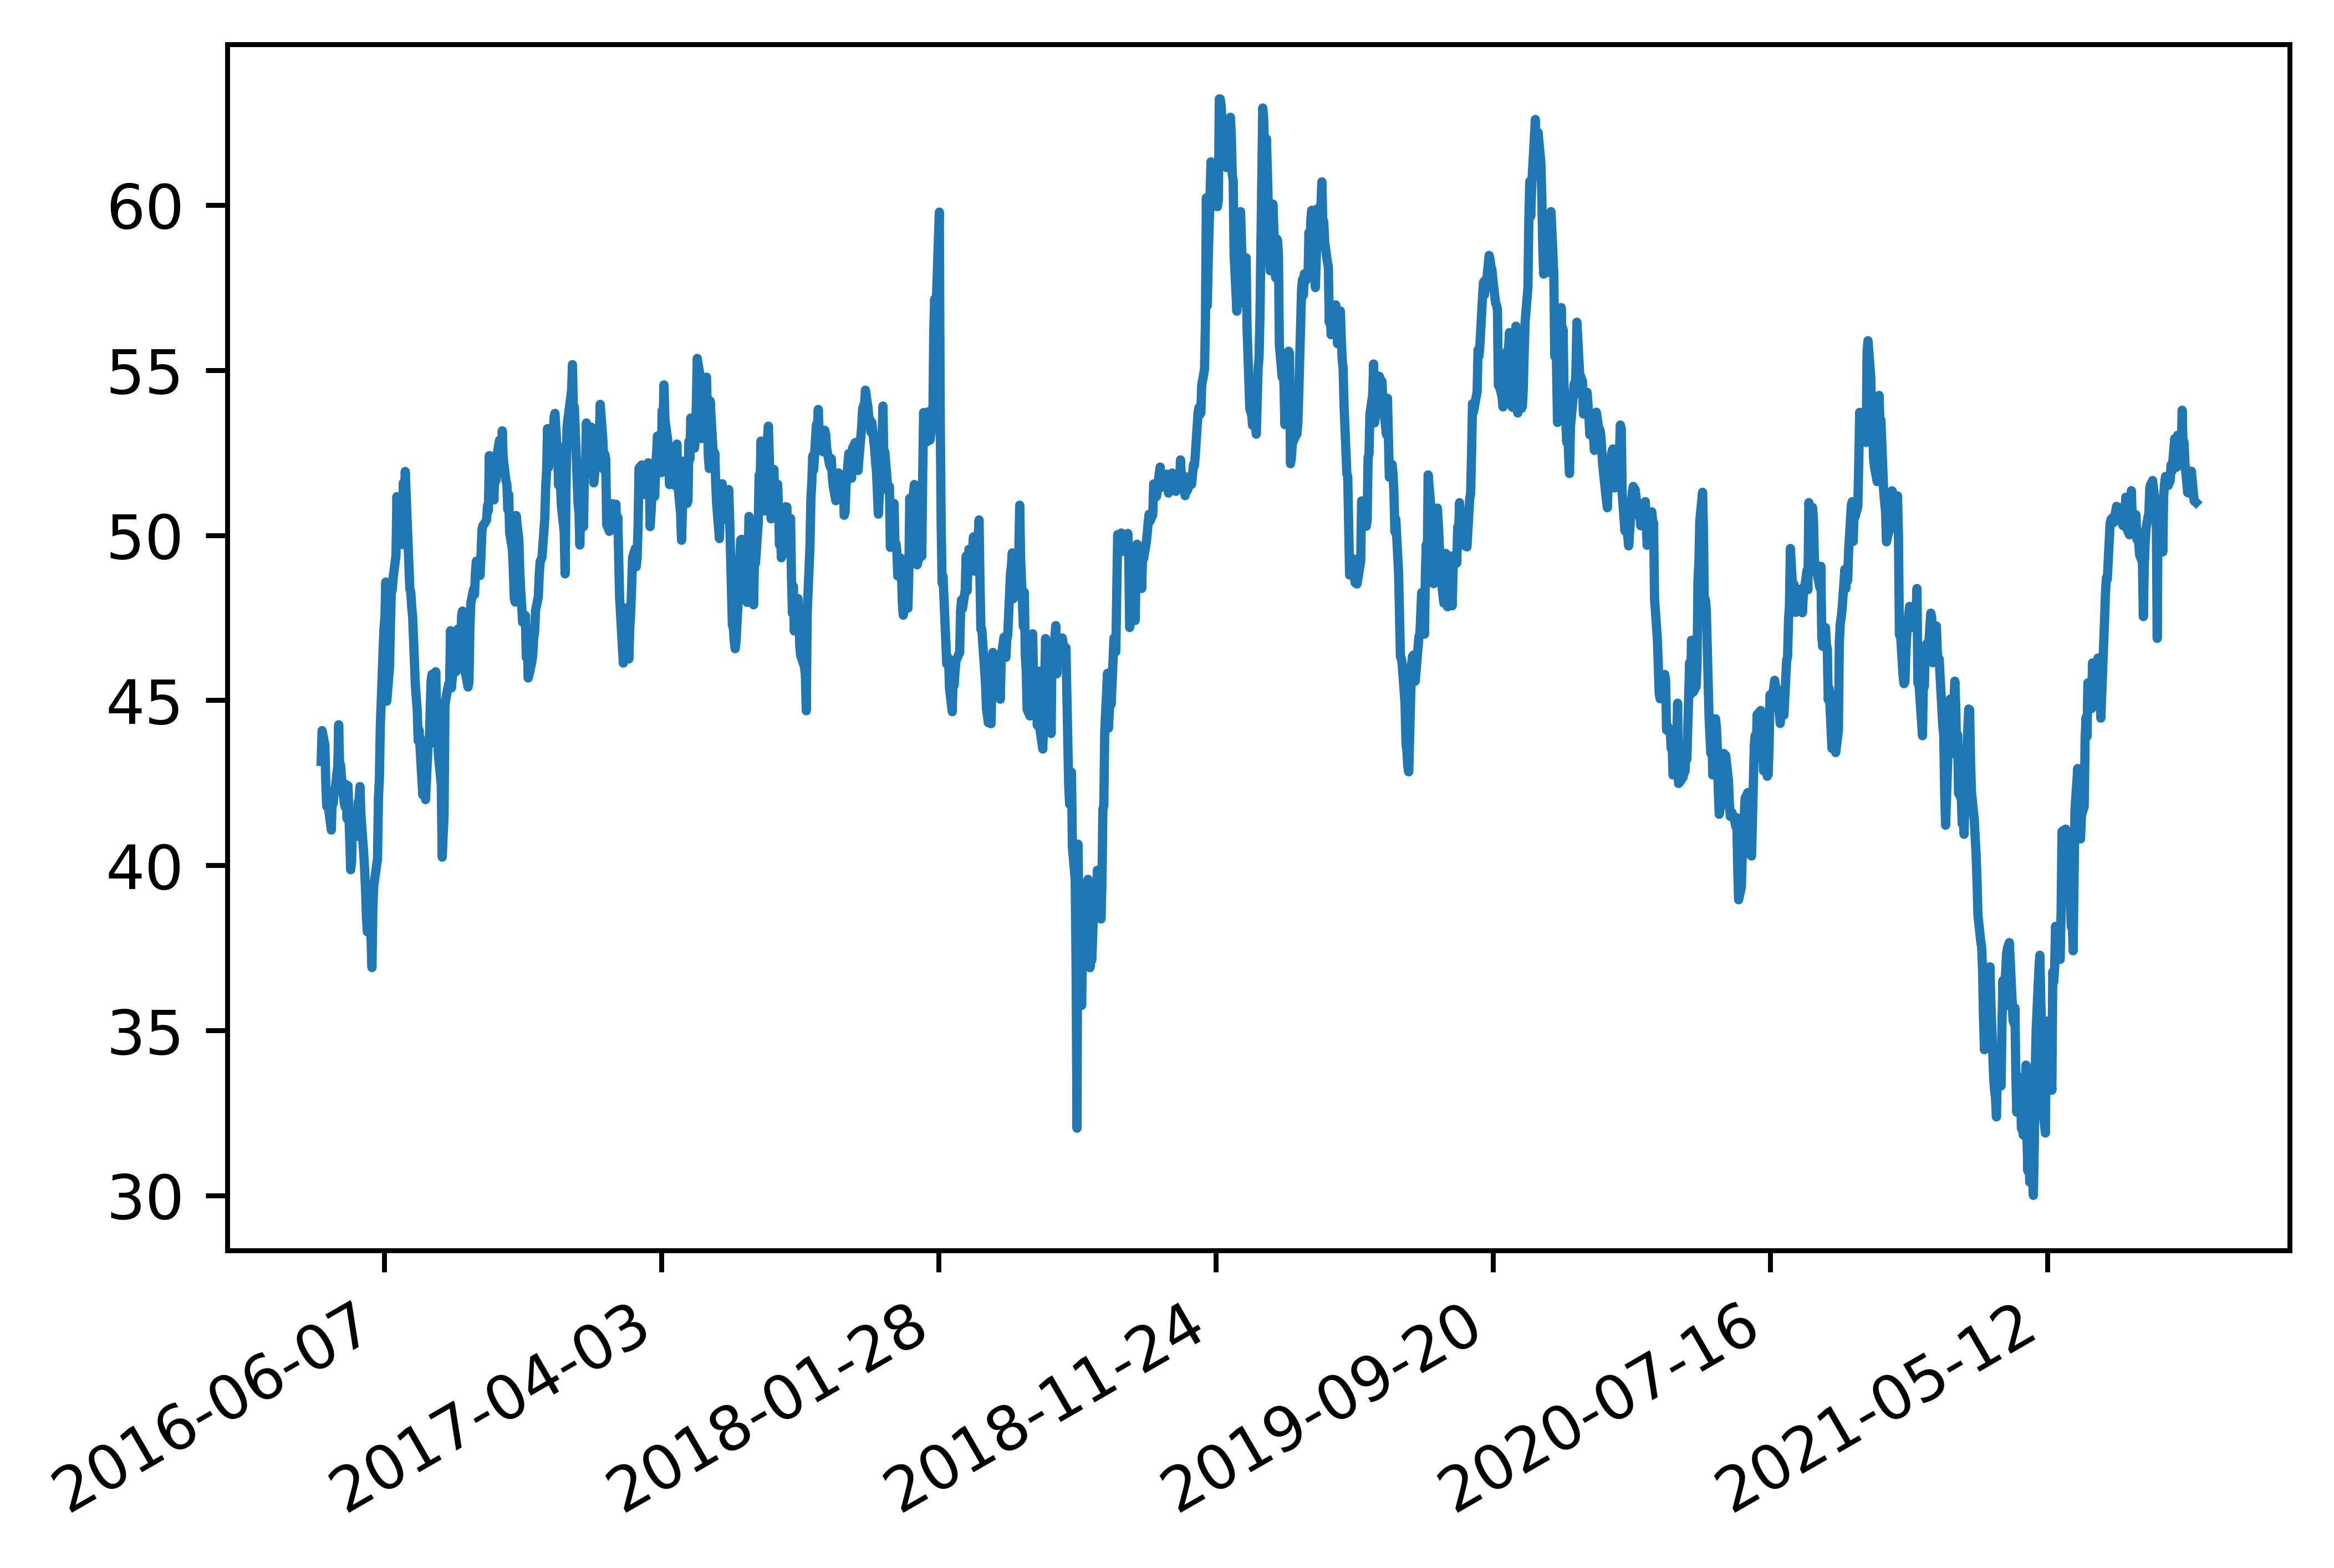

In [ ]:
plt.figure(dpi=800)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))
plt.plot(nasd['Date'][0:1500], rsi_new[0:1500])
plt.gcf().autofmt_xdate()
plt.show()


In [ ]:
!pip install finta

In [ ]:
from finta import TA

In [ ]:
nothing = TA.RSI(nasd, 14*7) # 14 weeks


In [ ]:
len(nothing)

2554

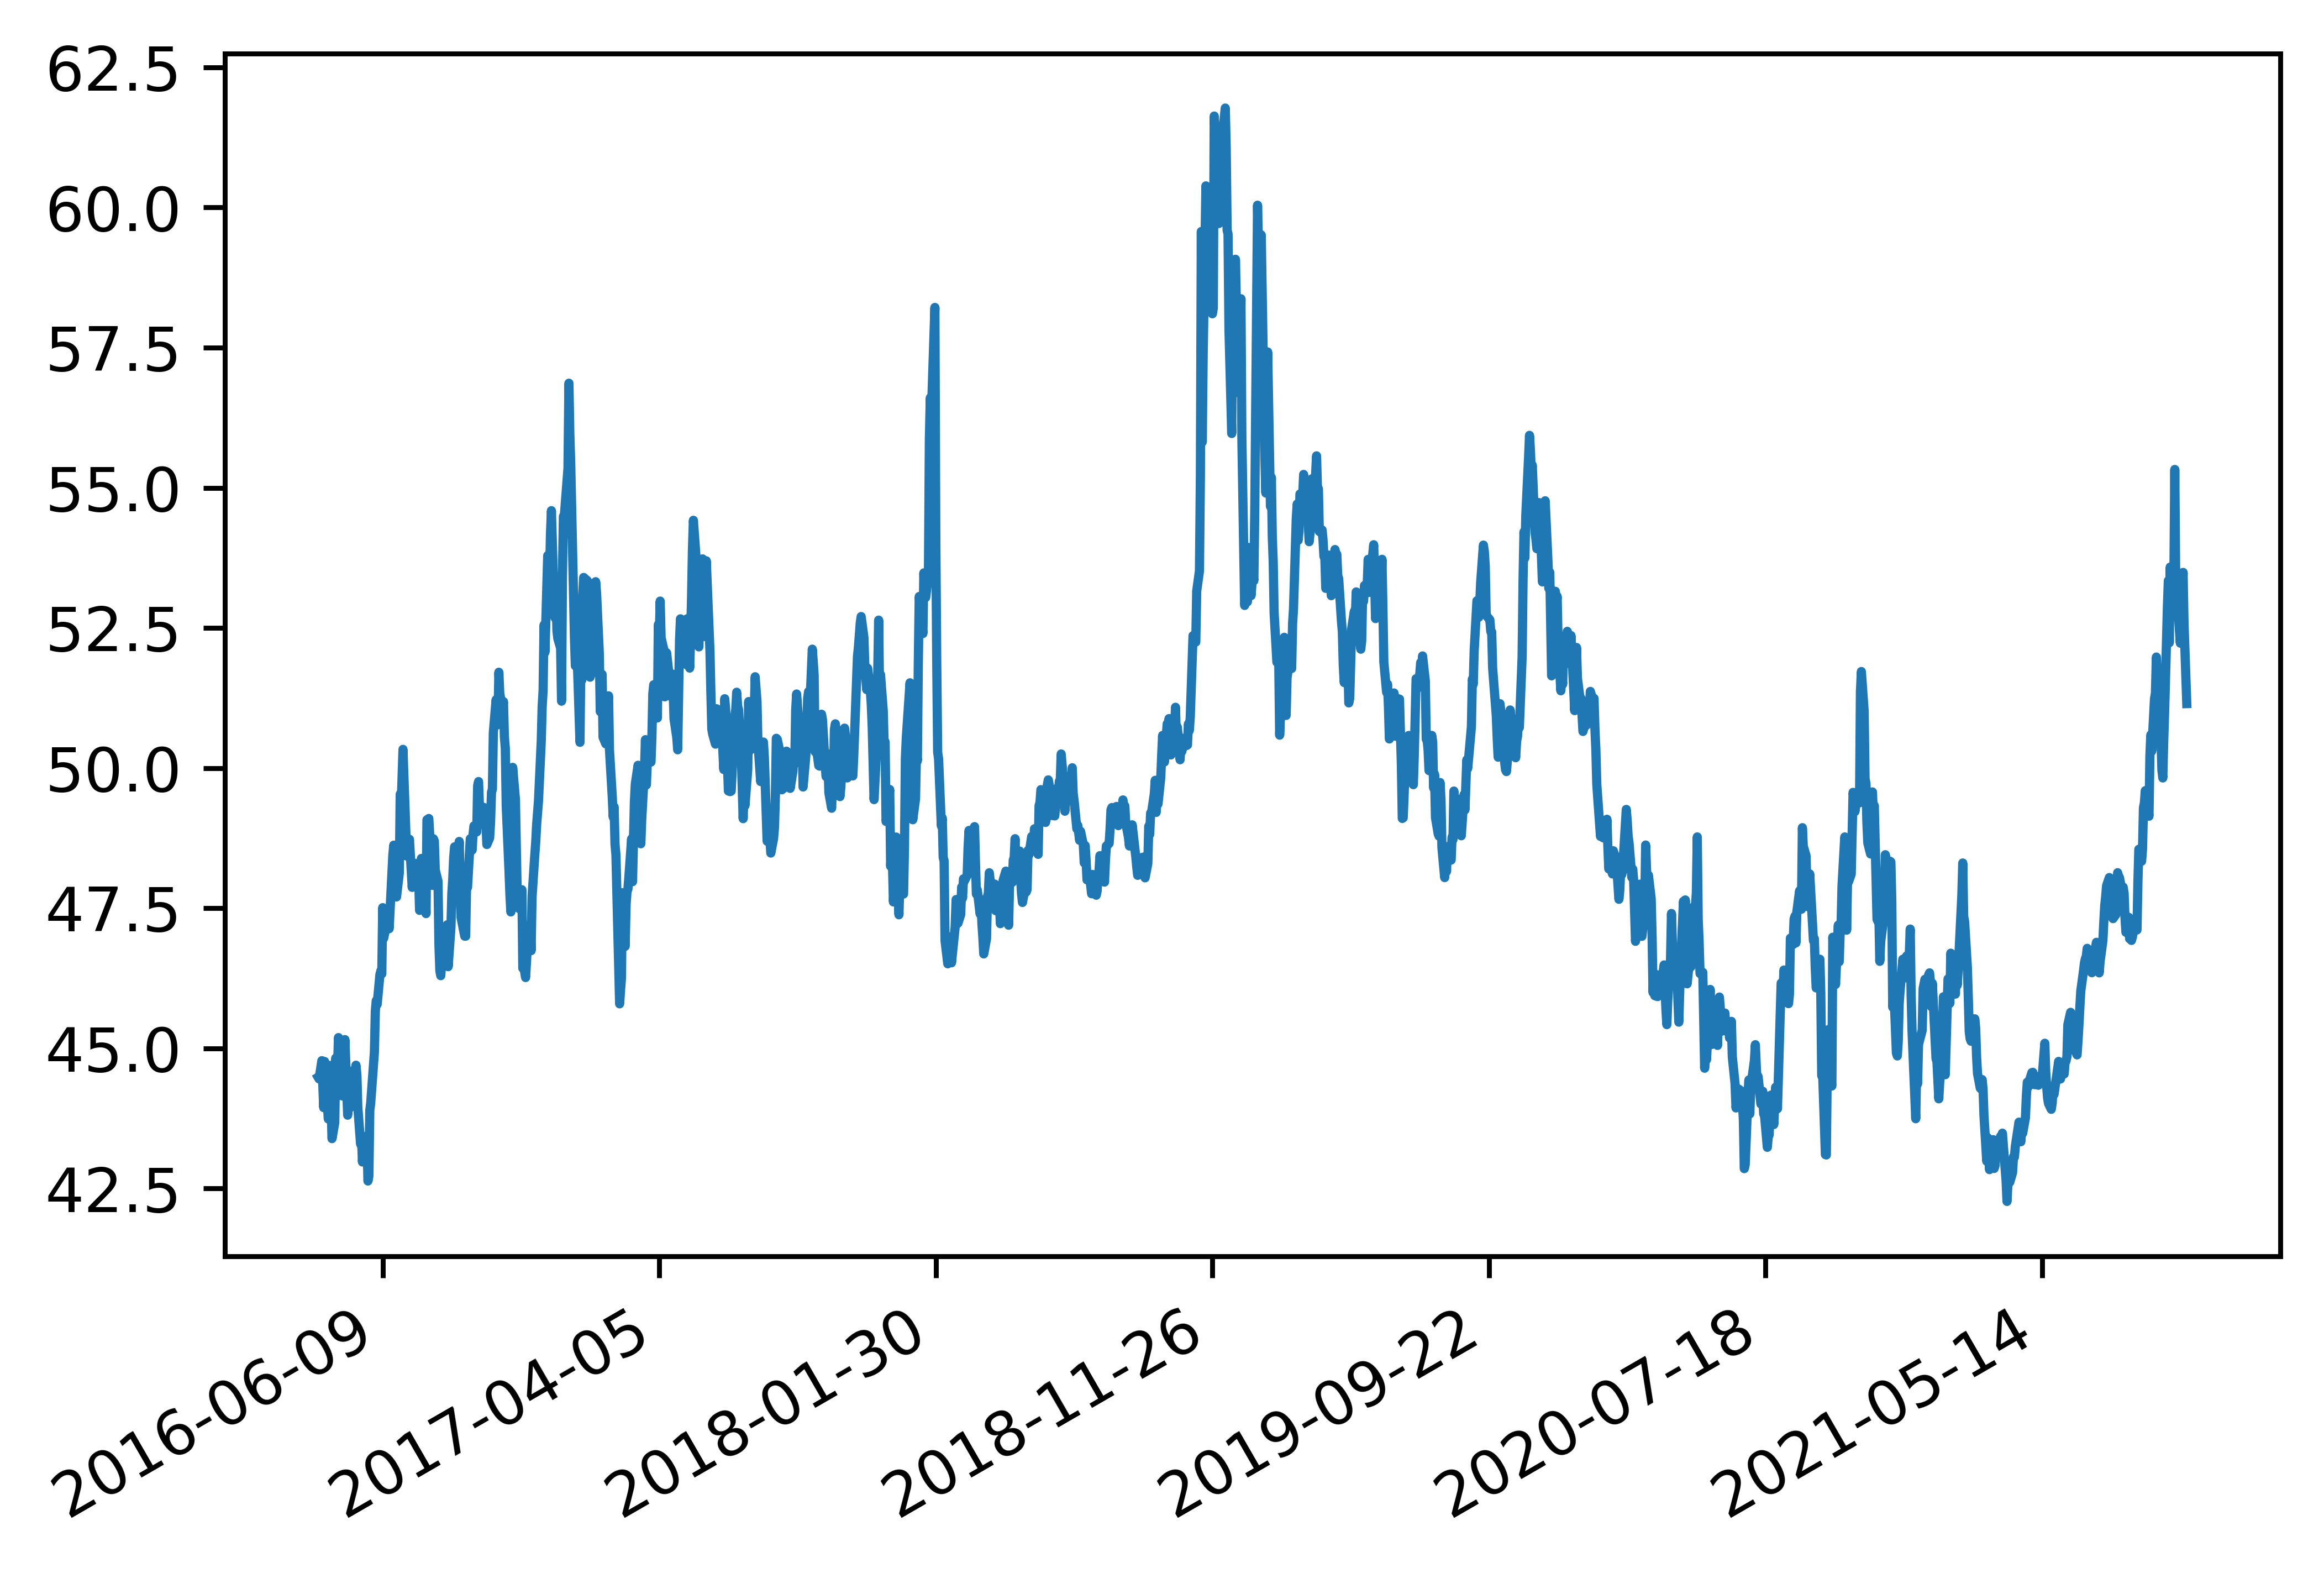

In [ ]:
plt.figure(dpi=800)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))
plt.plot(nasd['Date'][100:1500], nothing[100:1500])
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# 16 jan 2017 52.35 / 57.95
# 18 

In [ ]:
nasd.iloc[1299]

Date      2017-01-13 00:00:00
Close                   3.419
Volume                 2930.0
Open                    3.397
High                    3.469
Low                     3.457
Name: 1299, dtype: object

In [ ]:
nasd.iloc[1289]

Date      2017-01-30 00:00:00
Close                   3.232
Volume               122327.0
Open                      3.3
High                    3.342
Low                     3.216
Name: 1289, dtype: object

In [ ]:
nothing[1289]

52.03469733520033

# Concat

In [ ]:
nasd.head()

Date  Close    Volume   Open   High    Low
0 2022-03-11  4.725   77808.0  4.657  4.797  4.622
1 2022-03-10  4.631   75295.0  4.520  4.671  4.499
2 2022-03-09  4.526   87262.0  4.569  4.625  4.450
3 2022-03-08  4.527  152372.0  4.818  4.882  4.507
4 2022-03-07  4.833  125430.0  5.041  5.184  4.781

In [ ]:
ma = sma(nasd['Close'], 20*7)
ema = calculate_ema(nasd['Close'], 20*7)

In [ ]:
x = np.array(ma)
print(np.unique(x))

[0.         1.78567143 1.78571429 ... 4.68853571 4.69425714 4.7005    ]


In [ ]:
ema1 = calculate_ema(nasd['Close'], 12*7)
ema2 = calculate_ema(nasd['Close'], 26*7)
# len(ema1)
MACD = list()
for i in range(len(ema1)):
  MACD.append(ema1[i] - ema2[i])

In [ ]:
RSI = TA.RSI(nasd)

In [ ]:
RSI

In [ ]:
ma.reverse()
ema.reverse()
MACD.reverse()

In [ ]:
nasd['SMA'] = ma
nasd['EMA'] = ema
nasd['MACD'] = MACD
# nasd['RSI'] = RSI.reverse()


In [ ]:
nasd.head()

Date  Close    Volume   Open   High    Low       SMA       EMA  \
0 2022-03-11  4.725   77808.0  4.657  4.797  4.622  2.567271  2.570803   
1 2022-03-10  4.631   75295.0  4.520  4.671  4.499  2.571329  2.575145   
2 2022-03-09  4.526   87262.0  4.569  4.625  4.450  2.575793  2.579119   
3 2022-03-08  4.527  152372.0  4.818  4.882  4.507  2.581071  2.583365   
4 2022-03-07  4.833  125430.0  5.041  5.184  4.781  2.588343  2.587744   

       MACD  
0 -0.312644  
1 -0.314626  
2 -0.316987  
3 -0.319151  
4 -0.321241

In [ ]:
nasd = nasd.drop(columns=['SMA', 'EMA', 'MACD'])

In [ ]:
nasd.to_csv('/content/drive/MyDrive/SIH- Hack Inversion/Coding/data/initial_nymex_sma_ema_macd.csv')

# Data Viz

In [ ]:
looad = pd.read_csv('/content/drive/MyDrive/SIH- Hack Inversion/Coding/data/initial_nymex_sma_ema_macd.csv')
looad.head()

Unnamed: 0        Date  Close    Volume   Open   High    Low       SMA  \
0           0  2022-03-11  4.725   77808.0  4.657  4.797  4.622  2.567271   
1           1  2022-03-10  4.631   75295.0  4.520  4.671  4.499  2.571329   
2           2  2022-03-09  4.526   87262.0  4.569  4.625  4.450  2.575793   
3           3  2022-03-08  4.527  152372.0  4.818  4.882  4.507  2.581071   
4           4  2022-03-07  4.833  125430.0  5.041  5.184  4.781  2.588343   

        EMA      MACD  
0  2.570803 -0.312644  
1  2.575145 -0.314626  
2  2.579119 -0.316987  
3  2.583365 -0.319151  
4  2.587744 -0.321241

In [ ]:
looad = looad.drop(columns = ['Unnamed: 0'])
looad = looad.fillna(looad.mean())
looad.isna().sum()
# looad = looad.set_index('Date')


Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
SMA       0
EMA       0
MACD      0
dtype: int64

In [ ]:
looad.head()

Date  Close    Volume   Open   High    Low       SMA       EMA  \
0  2022-03-11  4.725   77808.0  4.657  4.797  4.622  2.567271  2.570803   
1  2022-03-10  4.631   75295.0  4.520  4.671  4.499  2.571329  2.575145   
2  2022-03-09  4.526   87262.0  4.569  4.625  4.450  2.575793  2.579119   
3  2022-03-08  4.527  152372.0  4.818  4.882  4.507  2.581071  2.583365   
4  2022-03-07  4.833  125430.0  5.041  5.184  4.781  2.588343  2.587744   

       MACD  
0 -0.312644  
1 -0.314626  
2 -0.316987  
3 -0.319151  
4 -0.321241

In [ ]:
looad = looad.reindex(index=looad.index[::-1])

In [ ]:
looad.head()

Date  Close    Volume   Open   High    Low  SMA  EMA  MACD
2553  2012-03-12  2.269   82299.0  2.272  2.289  2.235  0.0  0.0   0.0
2552  2012-03-13  2.299  114622.0  2.270  2.338  2.207  0.0  0.0   0.0
2551  2012-03-14  2.284  120435.0  2.329  2.343  2.248  0.0  0.0   0.0
2550  2012-03-15  2.279  117788.0  2.275  2.331  2.234  0.0  0.0   0.0
2549  2012-03-16  2.326  112037.0  2.267  2.349  2.247  0.0  0.0   0.0

In [ ]:
!pip install finta

In [ ]:
from finta import TA

In [ ]:
nothing = TA.RSI(looad, 14*7) # 14 weeks


In [ ]:
looad.reset_index(inplace = True)

In [ ]:
looad

index        Date  Close    Volume   Open   High    Low       SMA  \
0      2553  2012-03-12  2.269   82299.0  2.272  2.289  2.235  0.000000   
1      2552  2012-03-13  2.299  114622.0  2.270  2.338  2.207  0.000000   
2      2551  2012-03-14  2.284  120435.0  2.329  2.343  2.248  0.000000   
3      2550  2012-03-15  2.279  117788.0  2.275  2.331  2.234  0.000000   
4      2549  2012-03-16  2.326  112037.0  2.267  2.349  2.247  0.000000   
...     ...         ...    ...       ...    ...    ...    ...       ...   
2549      4  2022-03-07  4.833  125430.0  5.041  5.184  4.781  2.588343   
2550      3  2022-03-08  4.527  152372.0  4.818  4.882  4.507  2.581071   
2551      2  2022-03-09  4.526   87262.0  4.569  4.625  4.450  2.575793   
2552      1  2022-03-10  4.631   75295.0  4.520  4.671  4.499  2.571329   
2553      0  2022-03-11  4.725   77808.0  4.657  4.797  4.622  2.567271   

           EMA      MACD  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.000000  0.000000  
4     0.000000  0.000000  
...        ...       ...  
2549  2.587744 -0.321241  
2550  2.583365 -0.319151  
2551  2.579119 -0.316987  
2552  2.575145 -0.314626  
2553  2.570803 -0.312644  

[2554 rows x 10 columns]

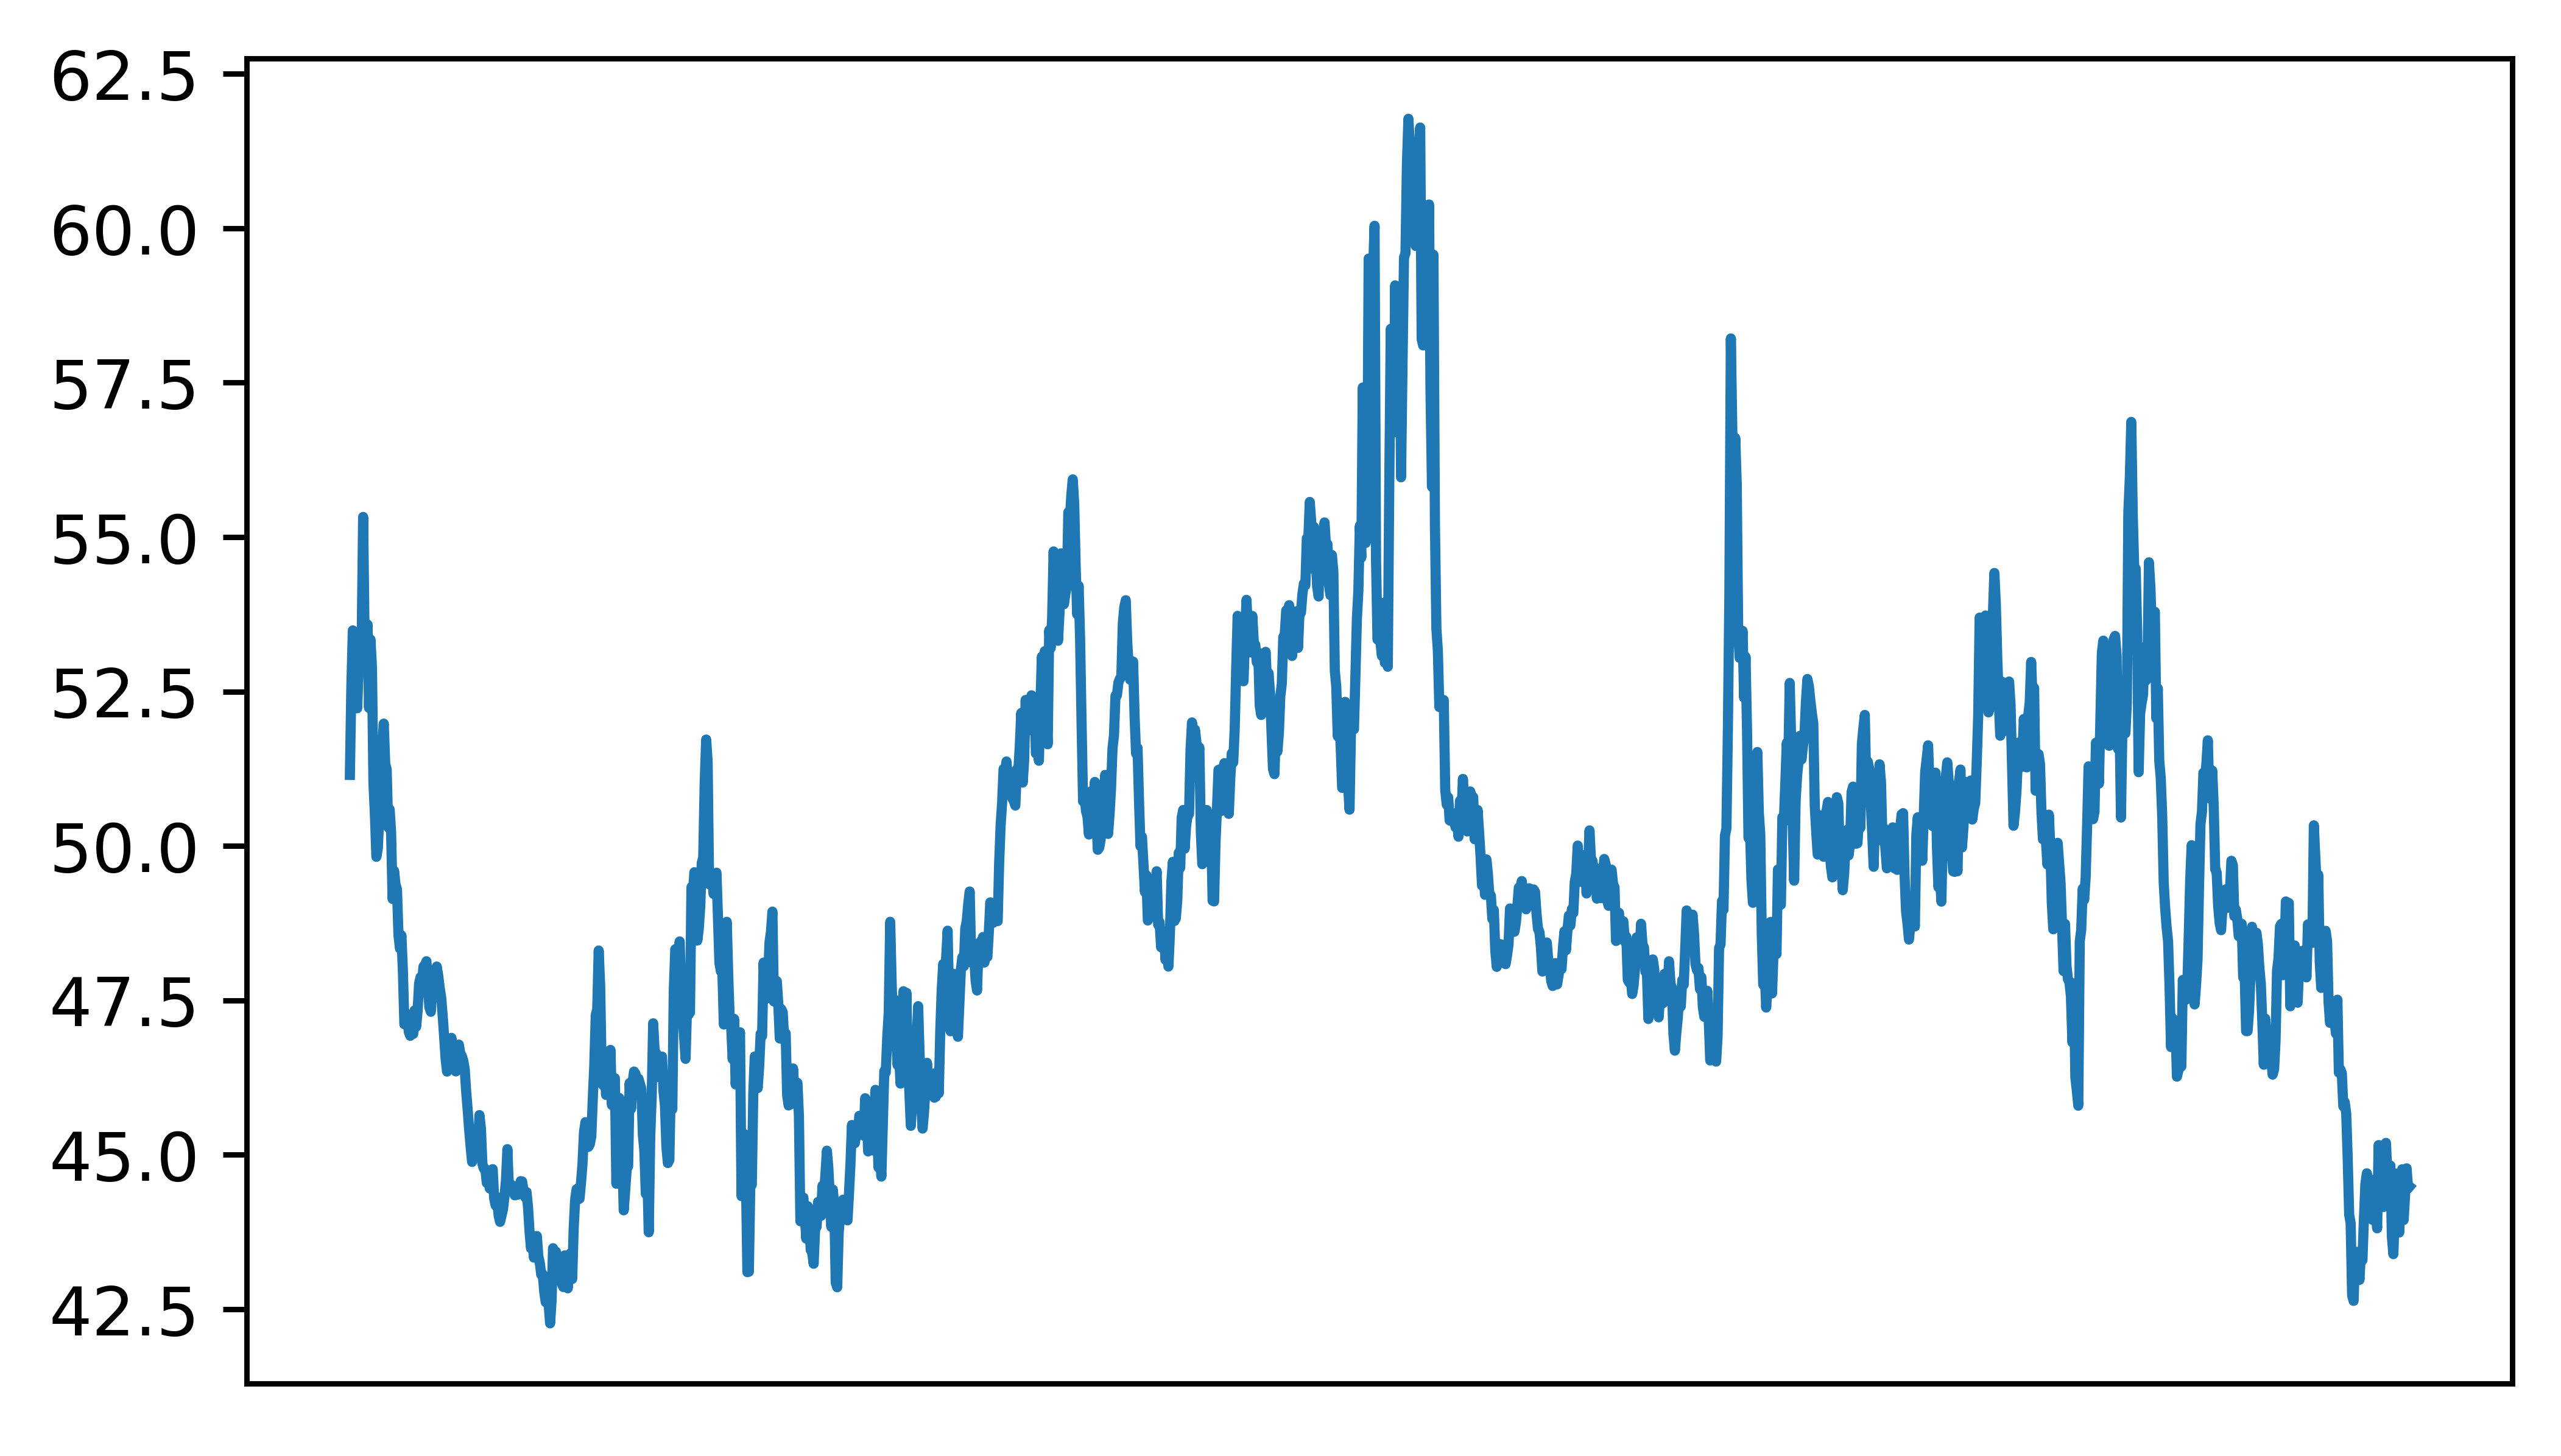

In [ ]:
plt.figure(dpi=800)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))
plt.plot(looad['Date'][100:1500], nothing[100:1500])
plt.gcf().autofmt_xdate()
plt.show()

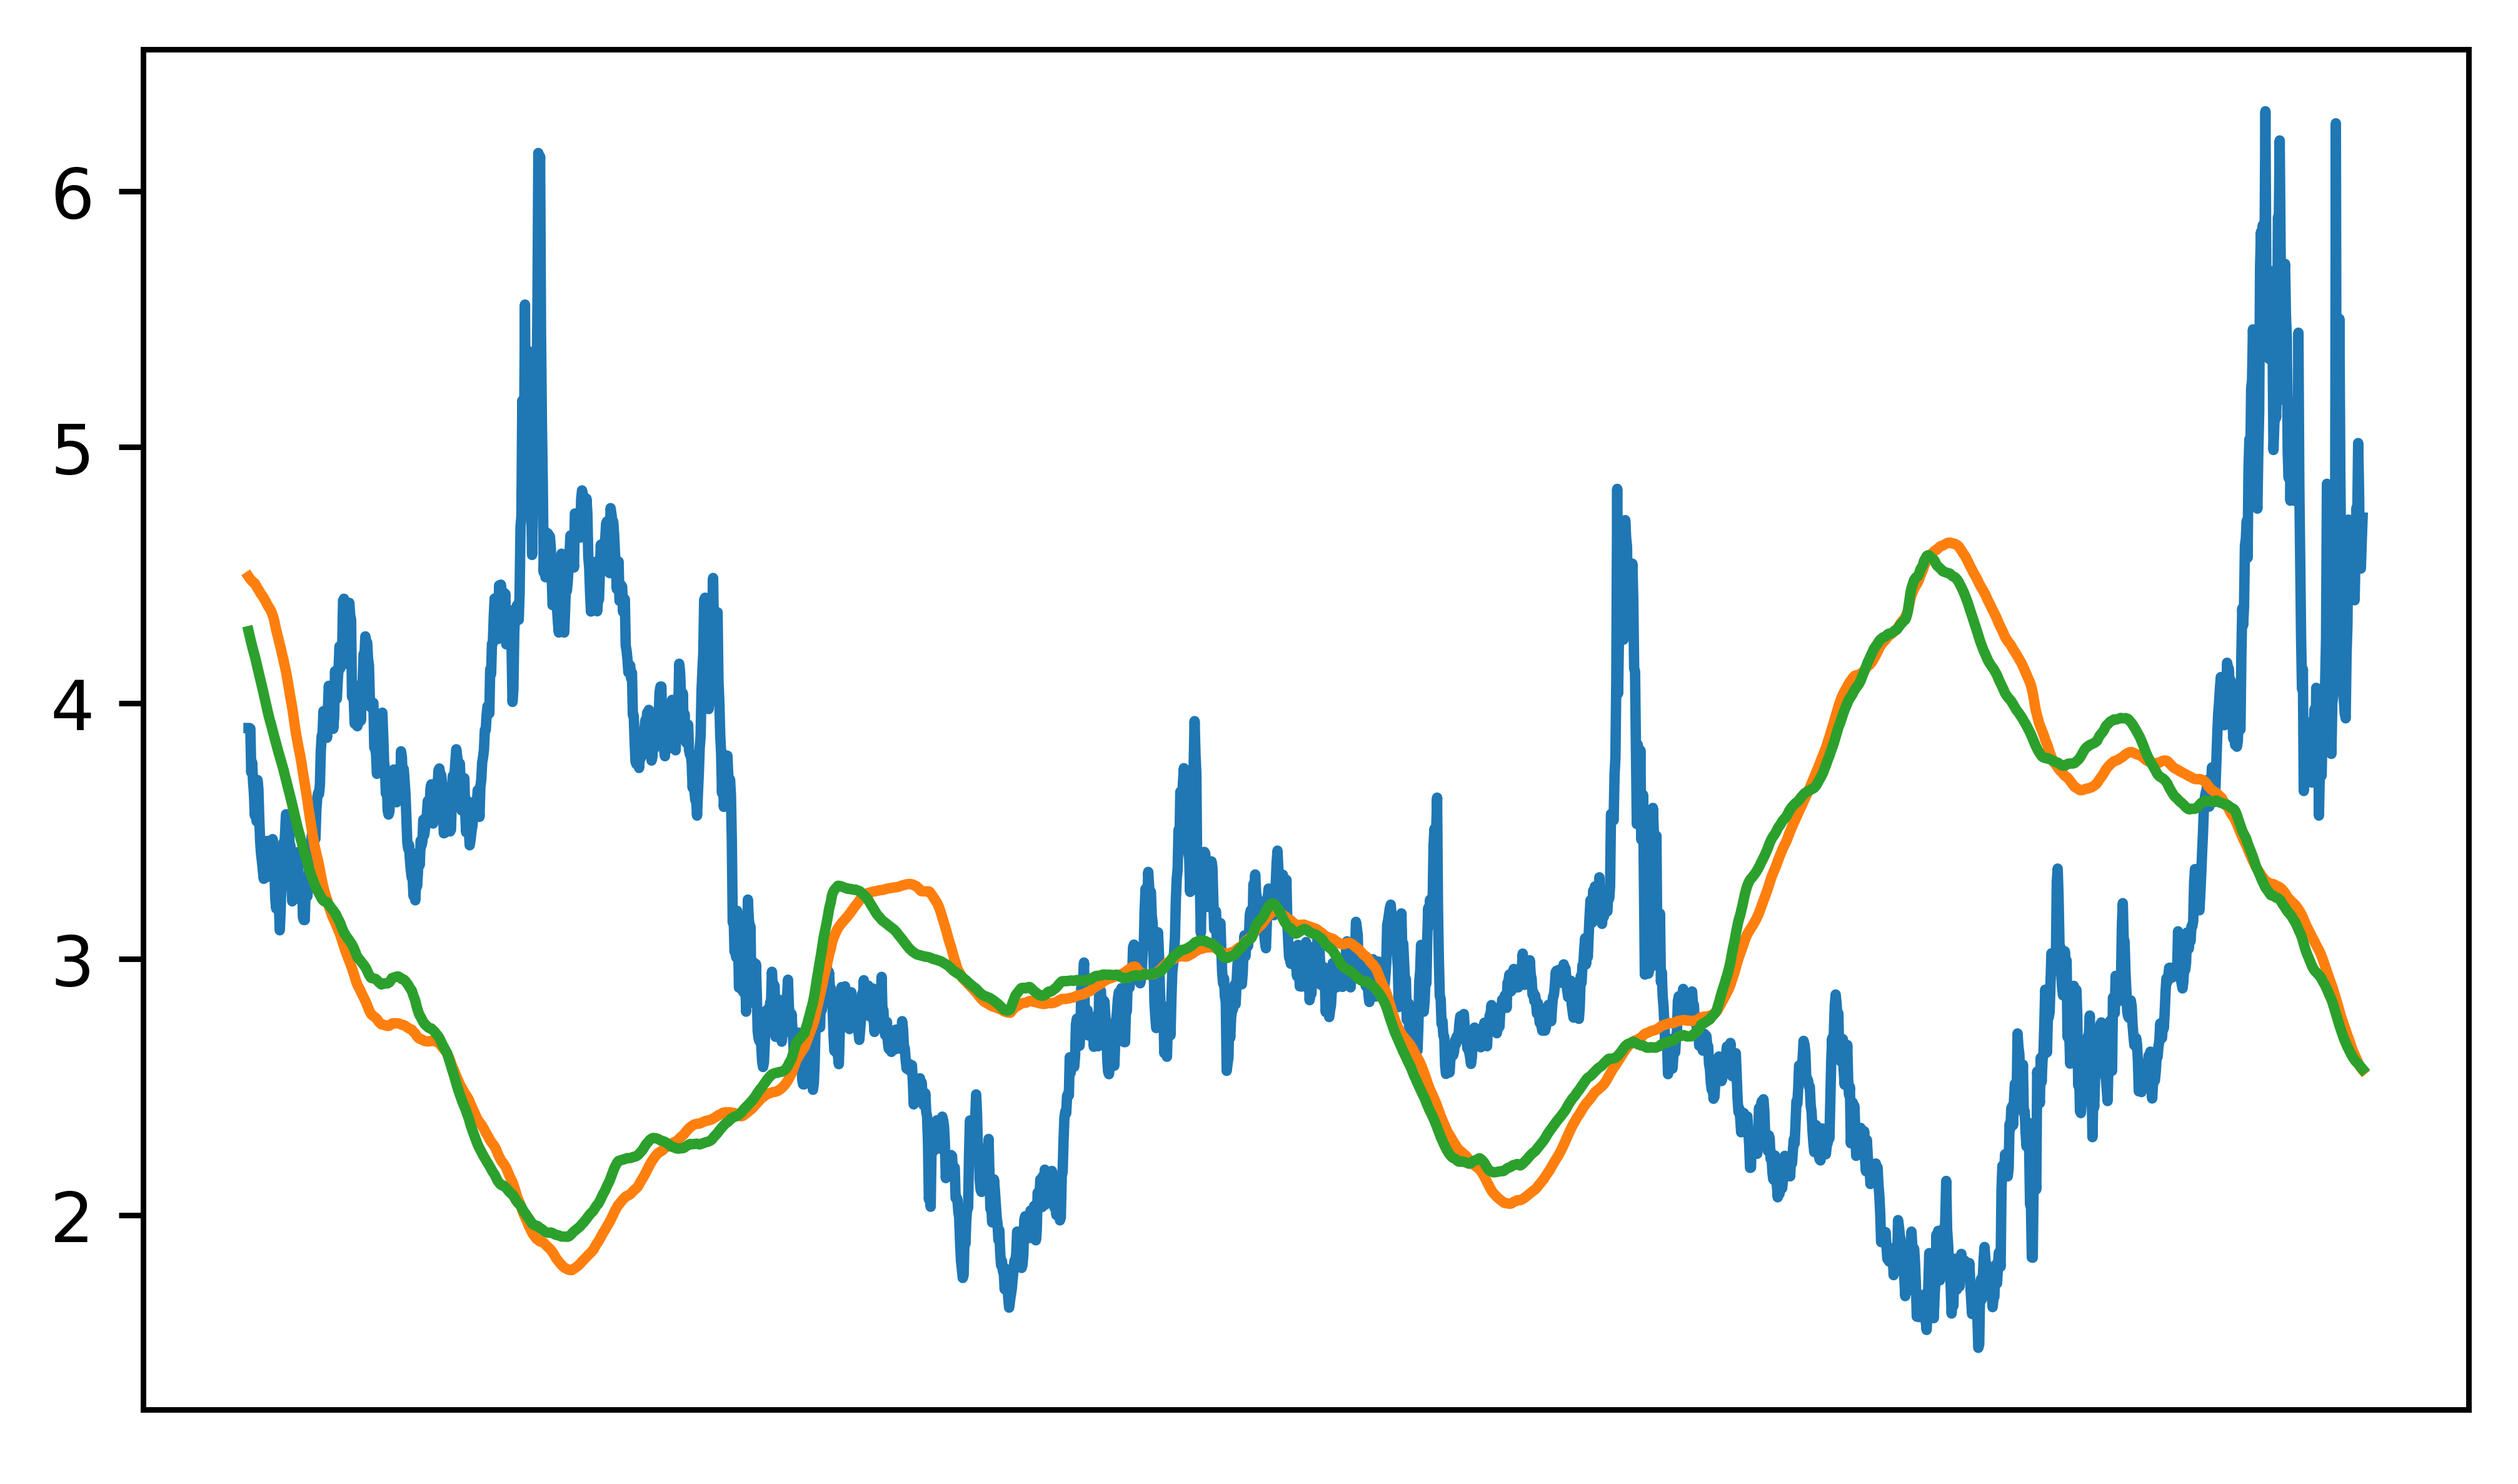

In [ ]:
plt.figure(dpi=800)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))
plt.plot(looad['Date'][182:], looad['Close'][182:])
plt.plot(looad['Date'][182:], looad['SMA'][182:])
plt.plot(looad['Date'][182:], looad['EMA'][182:])
# plt.plot(looad['Date'][182:], looad['MACD'][182:])
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
looad=looad.drop(columns=['index'])

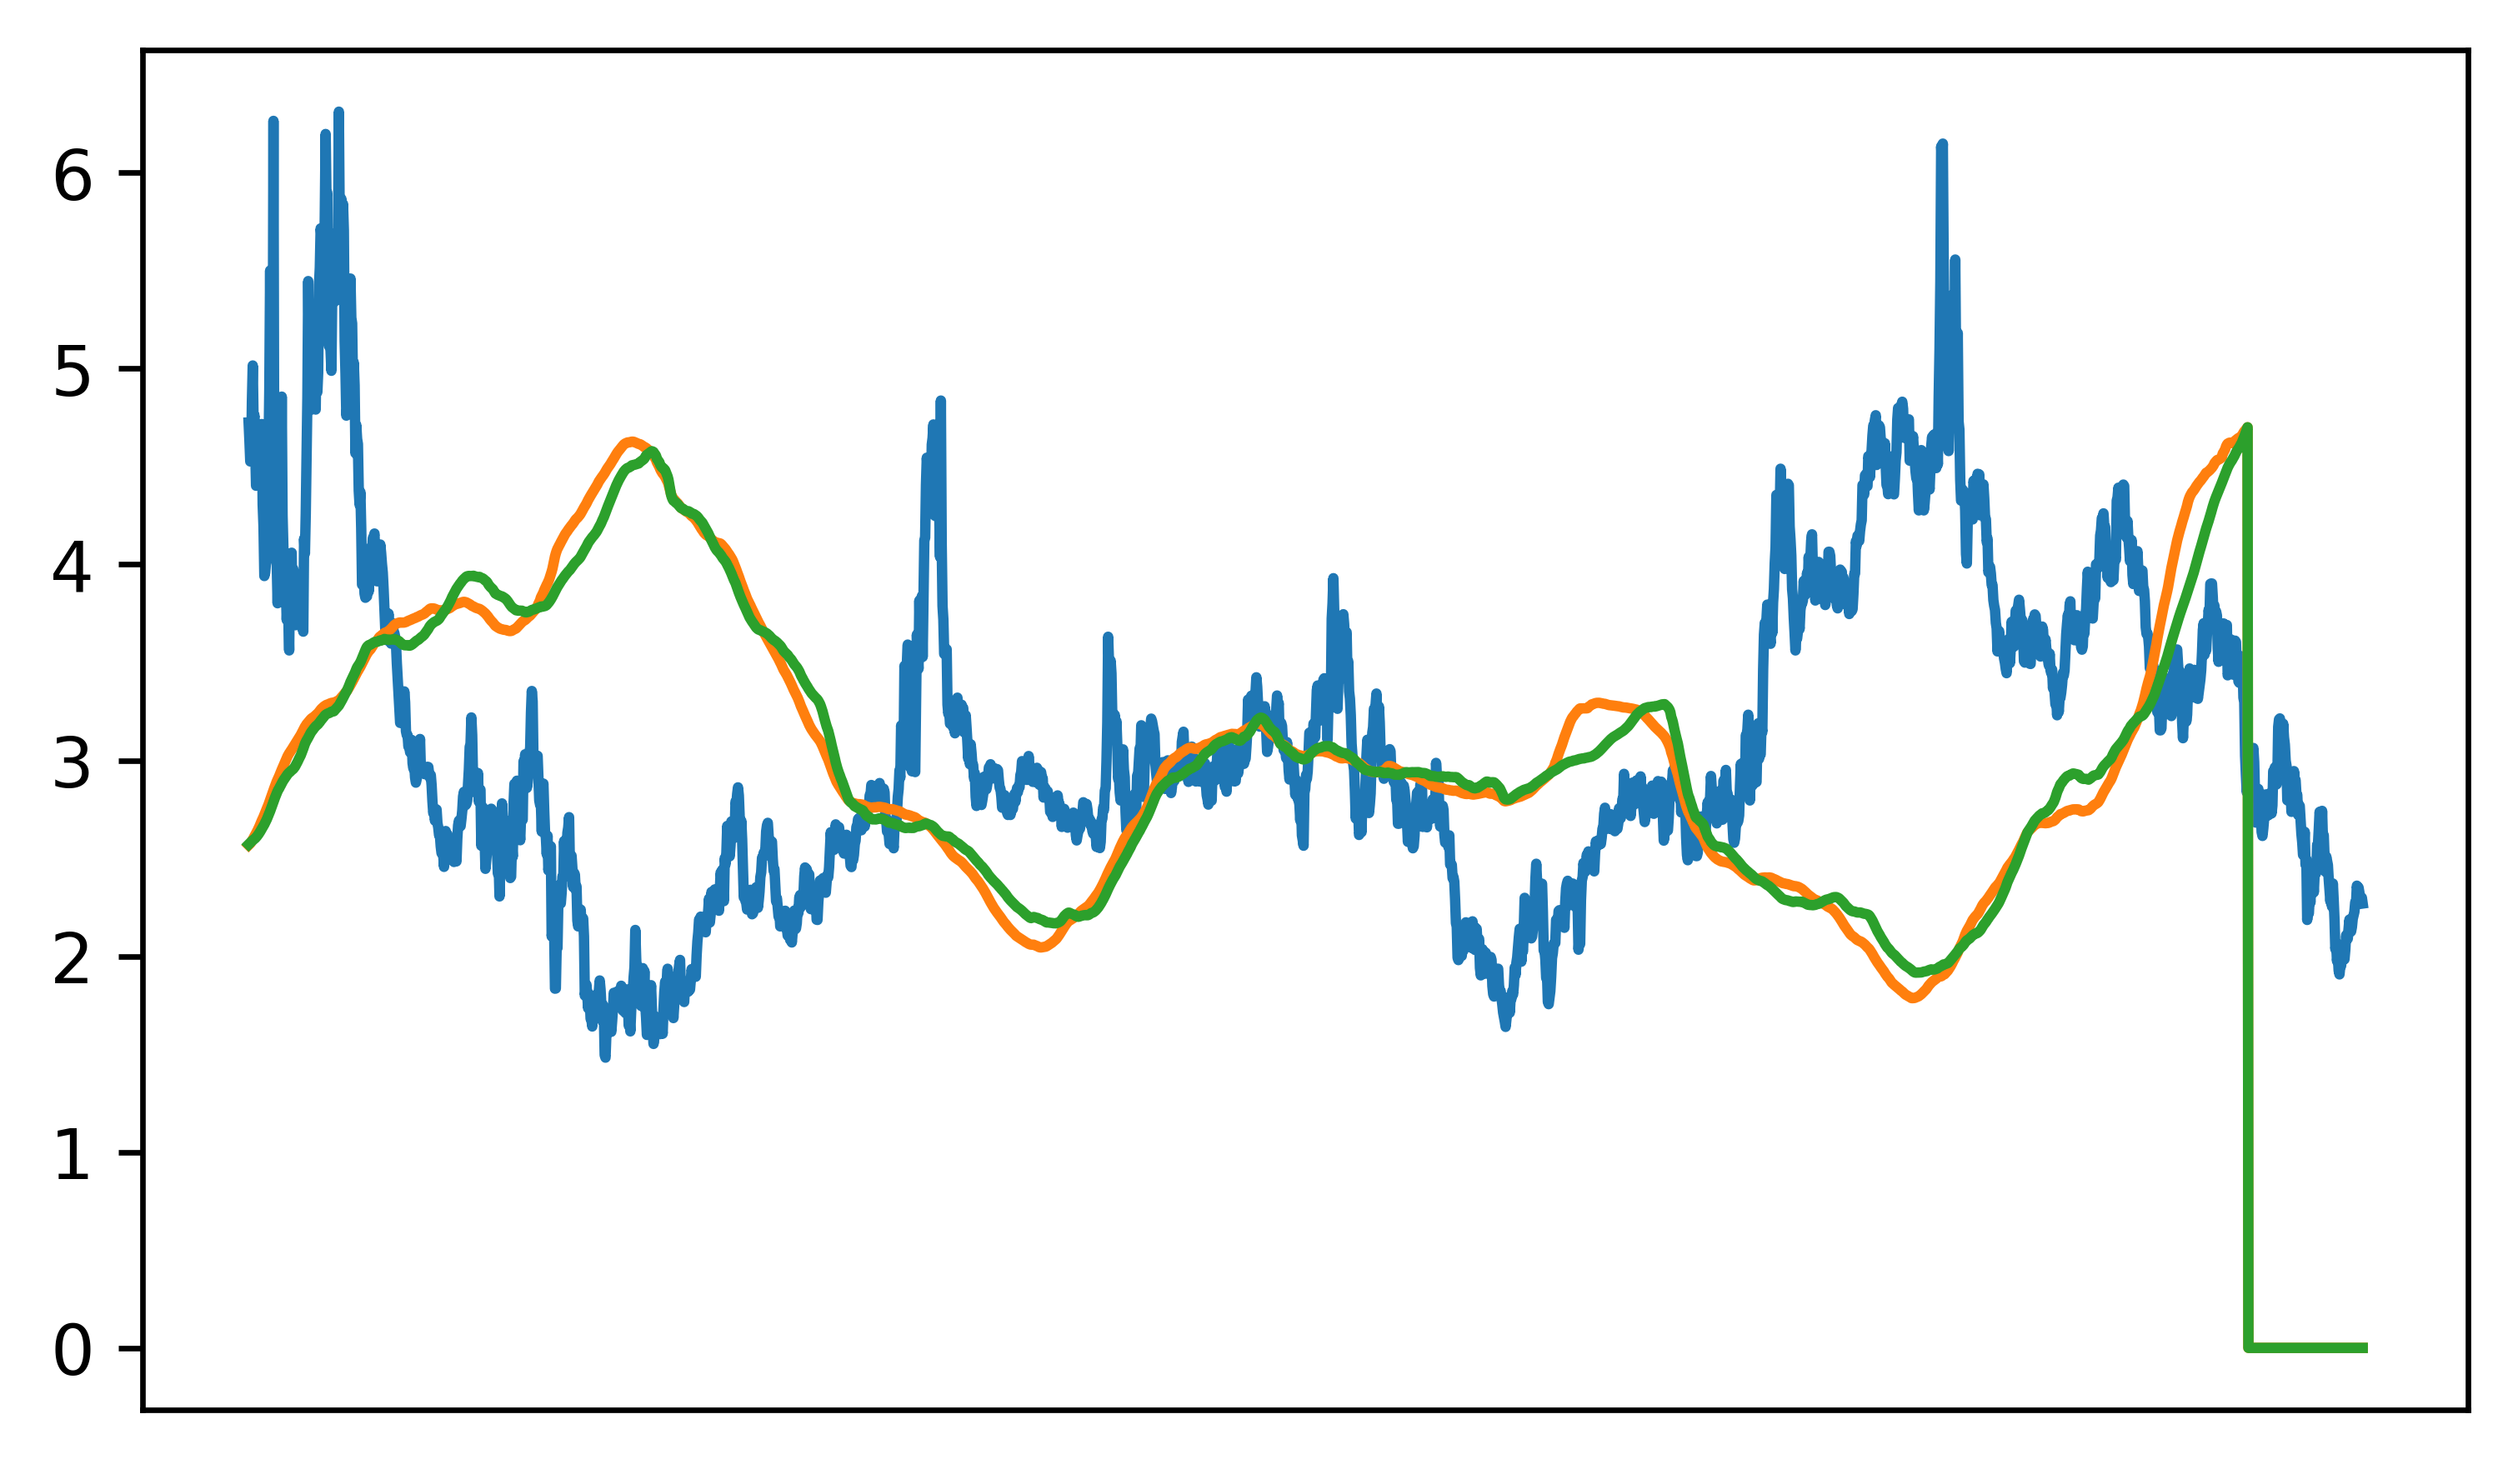

In [ ]:
plt.figure(dpi=600)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))
plt.plot(looad['Date'], looad['Close'])
plt.plot(looad['Date'], looad['SMA'])
plt.plot(looad['Date'], looad['EMA'])
# plt.plot(looad['Date'][182:], looad['MACD'][182:])
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
looad

Date  Close    Volume   Open   High    Low       SMA       EMA  \
0     2012-03-12  2.269   82299.0  2.272  2.289  2.235  0.000000  0.000000   
1     2012-03-13  2.299  114622.0  2.270  2.338  2.207  0.000000  0.000000   
2     2012-03-14  2.284  120435.0  2.329  2.343  2.248  0.000000  0.000000   
3     2012-03-15  2.279  117788.0  2.275  2.331  2.234  0.000000  0.000000   
4     2012-03-16  2.326  112037.0  2.267  2.349  2.247  0.000000  0.000000   
...          ...    ...       ...    ...    ...    ...       ...       ...   
2549  2022-03-07  4.833  125430.0  5.041  5.184  4.781  2.588343  2.587744   
2550  2022-03-08  4.527  152372.0  4.818  4.882  4.507  2.581071  2.583365   
2551  2022-03-09  4.526   87262.0  4.569  4.625  4.450  2.575793  2.579119   
2552  2022-03-10  4.631   75295.0  4.520  4.671  4.499  2.571329  2.575145   
2553  2022-03-11  4.725   77808.0  4.657  4.797  4.622  2.567271  2.570803   

          MACD  
0     0.000000  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.000000  
...        ...  
2549 -0.321241  
2550 -0.319151  
2551 -0.316987  
2552 -0.314626  
2553 -0.312644  

[2554 rows x 9 columns]

In [ ]:
ma = sma(looad['Close'], 20*7)
ema = calculate_ema(looad['Close'], 21*7)

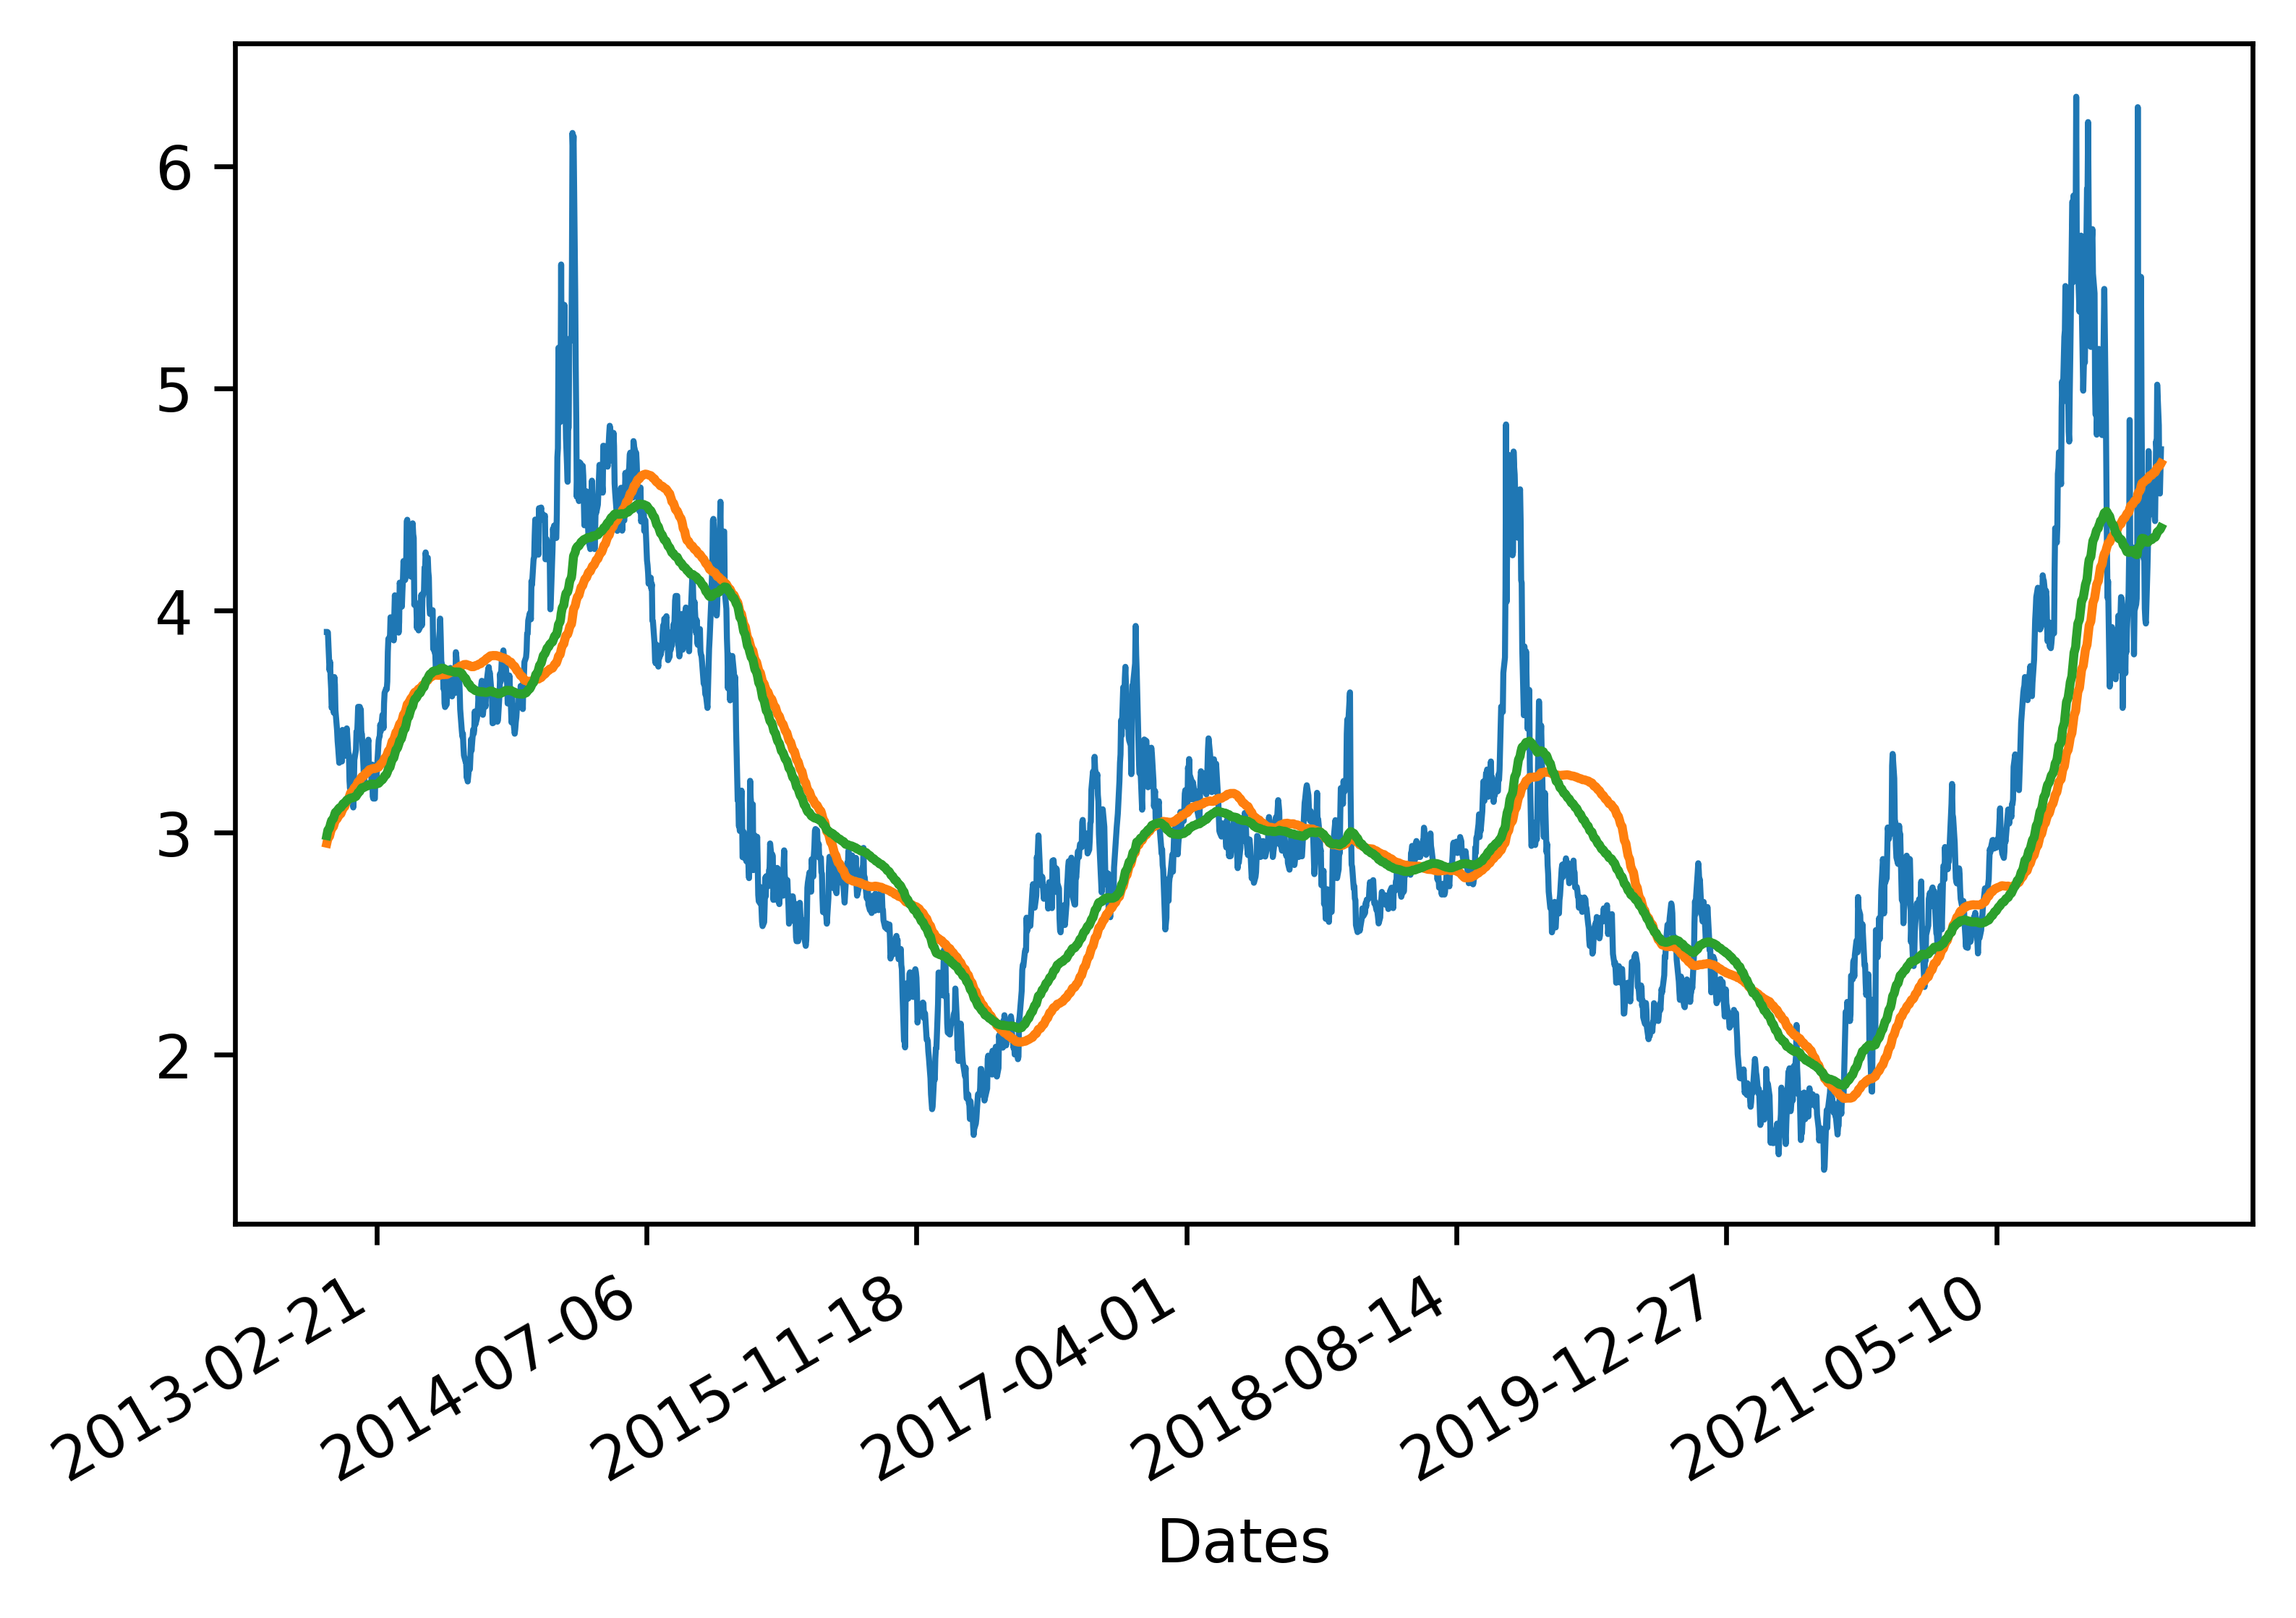

In [ ]:
plt.figure(dpi=600)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.plot(looad['DateTime'][182:], looad['Close'][182:], lw=1)
plt.plot(looad['DateTime'][182:], ma[182:], lw=1.5)
plt.plot(looad['DateTime'][182:], ema[182:], lw=1.5)
plt.xlabel('Dates')
plt.gcf().autofmt_xdate()
plt.show()

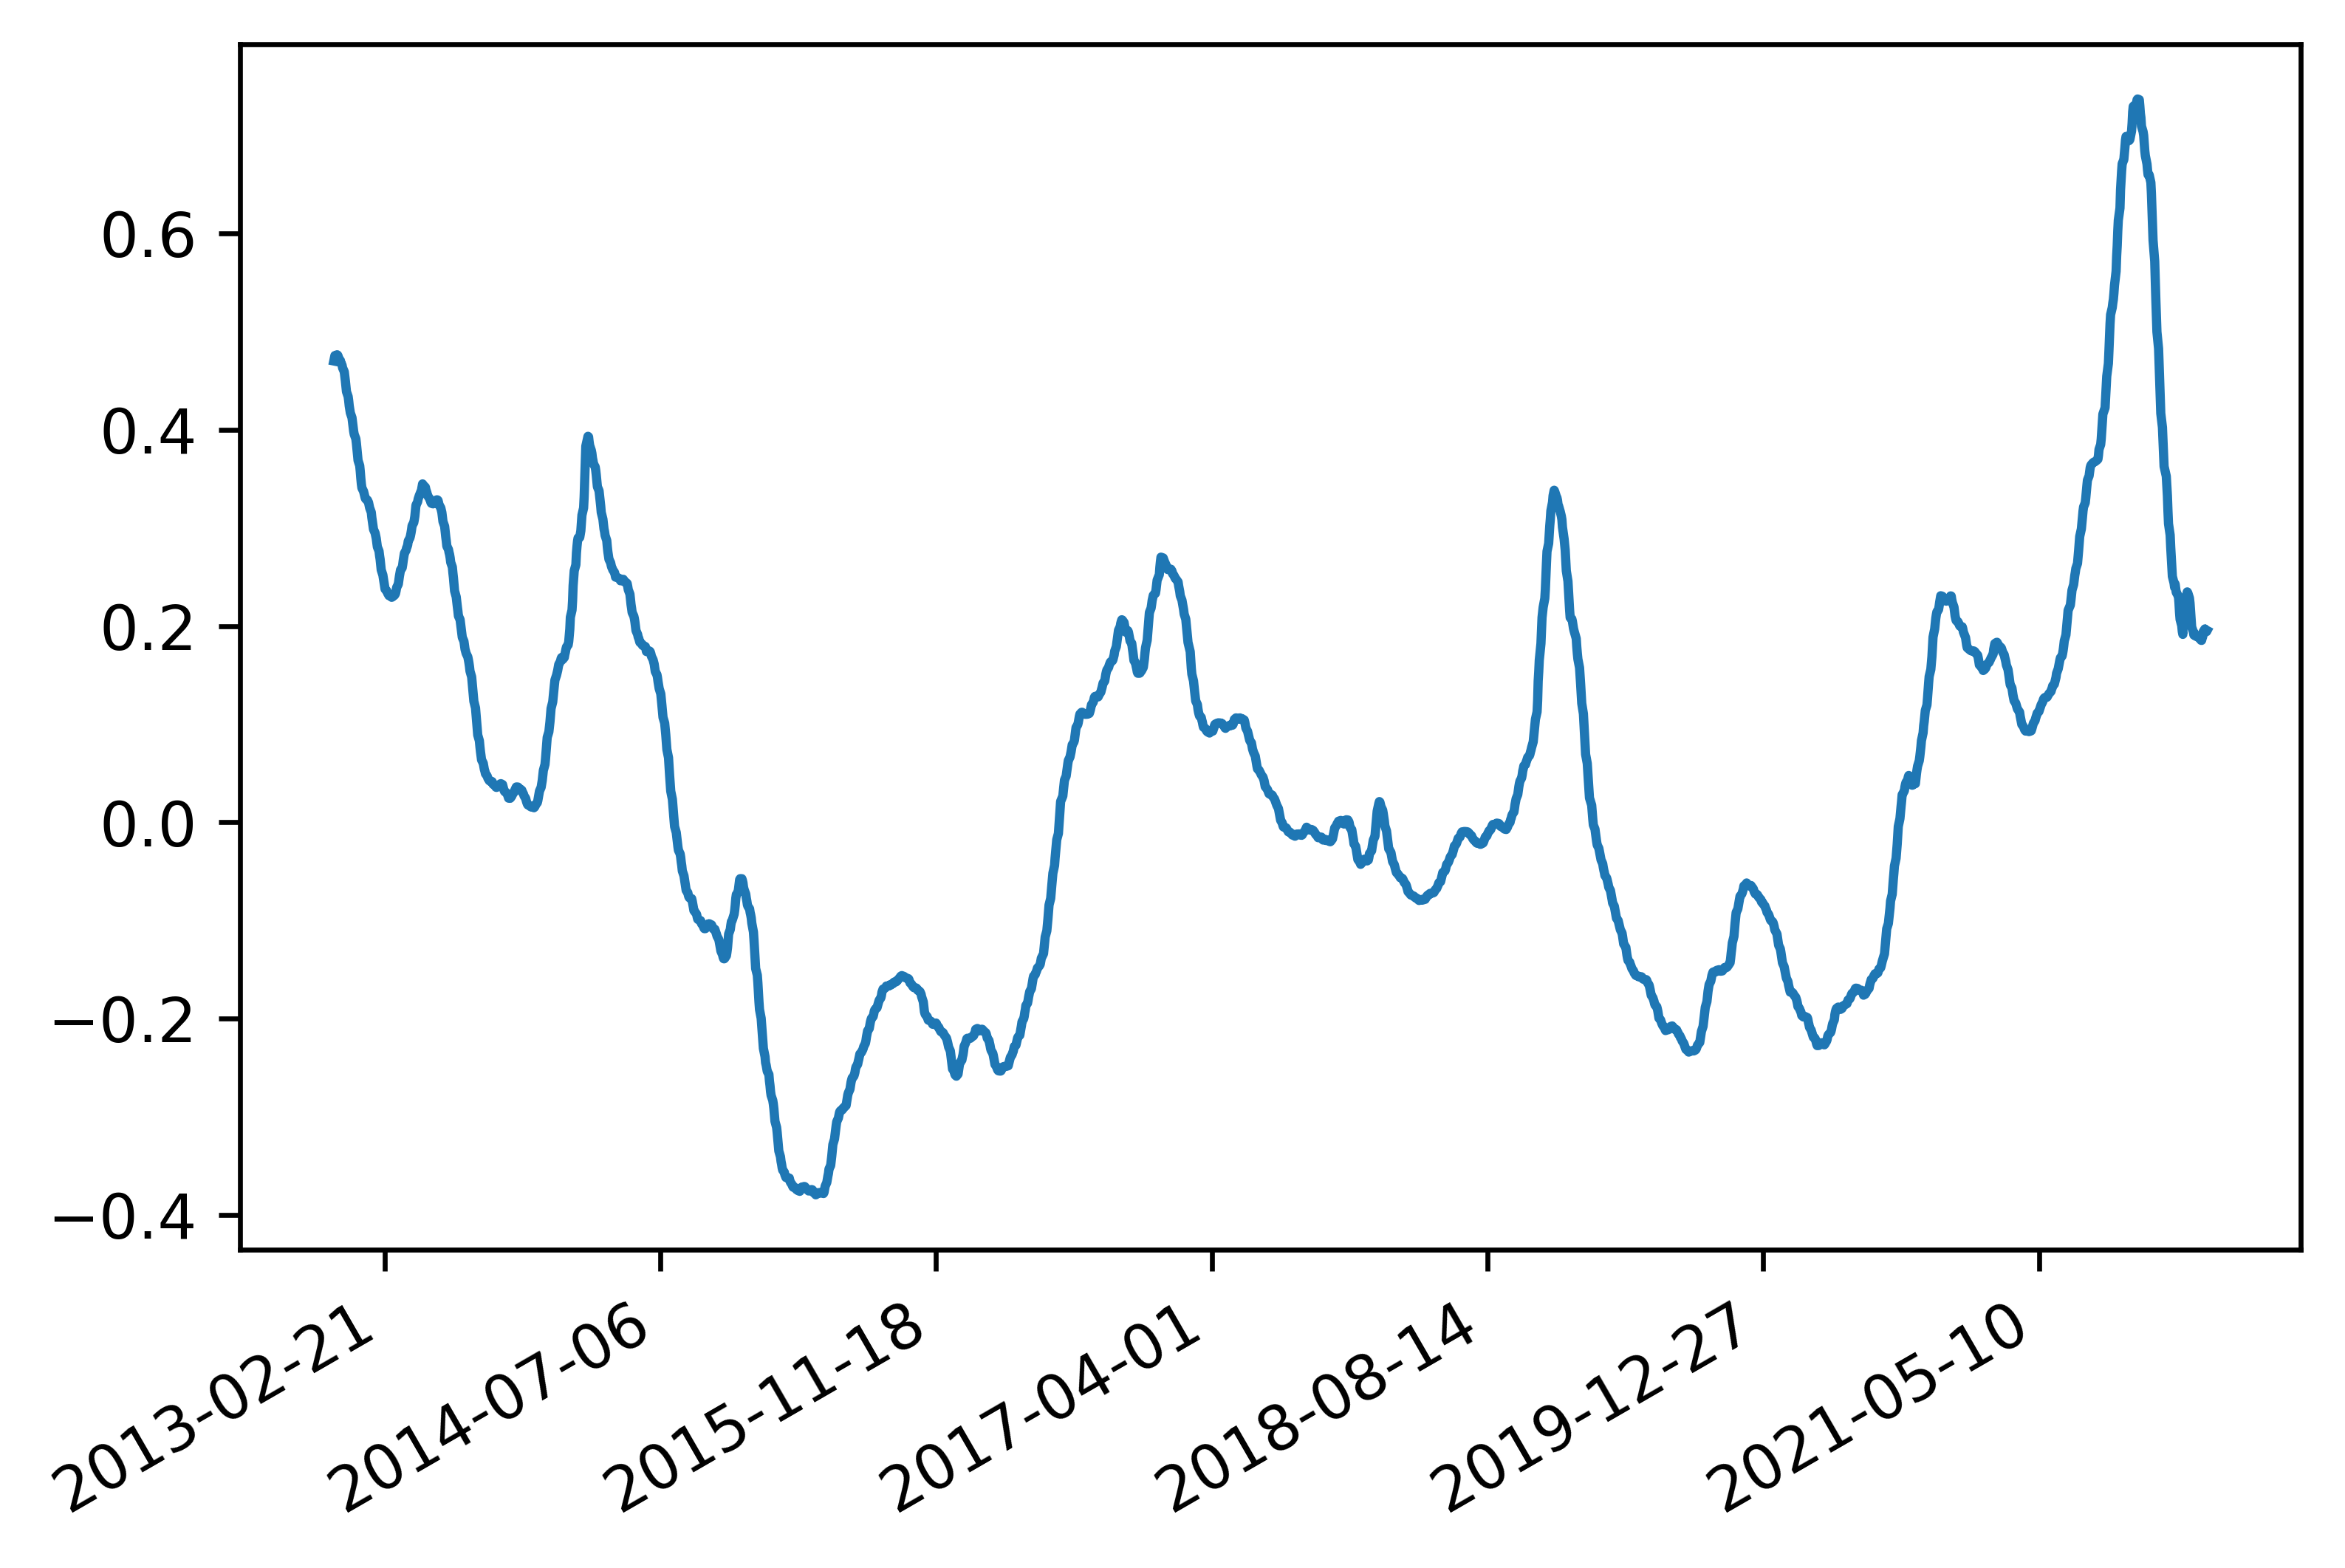

In [ ]:
plt.figure(dpi=600)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.plot(looad['DateTime'][182:], what[182:])
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
ema1 = calculate_ema(looad['Close'], 12*7)
ema2 = calculate_ema(looad['Close'], 26*7)
# len(ema1)
what = list()
for i in range(len(ema1)):
  what.append(ema1[i] - ema2[i])

In [ ]:
what

### BMSB

In [ ]:
ma = sma(looad['Close'], 21*7)
ema = calculate_ema(looad['Close'], 21*7)


In [ ]:
ma[300:307]

[3.634224489795918,
 3.6363265306122448,
 3.6396734693877555,
 3.6433877551020406,
 3.6463809523809525,
 3.6486802721088436,
 3.651448979591837]

In [ ]:
ema[300:307]

[3.6064646410840604,
 3.6107016053937353,
 3.615665097212739,
 3.6206290823855403,
 3.6245395001911414,
 3.6285997772155856,
 3.633943023469429]

In [ ]:
u = [sum(x)/2 for x in zip(ma, ema)]

In [ ]:
Kr = 0.3
Kp = 0.9

In [ ]:
P = looad['Close'][300]
P

4.011

In [ ]:
looad['DateTime'] =  pd.to_datetime(looad['Date'], format='%Y-%m-%d')


In [ ]:
type(looad['DateTime'][12])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
custom = list()
for i in range(len(u)):
  P = looad['Close'][i]
  if (P > u[i]*(1 - Kr)) and (P < u[i]*(1 + Kr)):

    x = ((P - u[i])*Kp*100)/(u[i]*Kr)

  elif (P < u[i]*(1 - Kr)):

    x = (P*(1 - Kp)/(u[i]*(1 - Kr)) - 1)*100

  else:
    
    x = (1 - (u[i]*(1 + Kr)*(1 - Kp))/P)*100
  custom.append(x)

In [ ]:
len(custom)

2554

In [ ]:
type(looad['Date'][12])

str

In [ ]:
index_min = np.argmin(custom)

In [ ]:
index_max = np.argmax(custom)

In [ ]:
index_min

983

In [ ]:
custom[index_max]

100.0

In [ ]:
y = [custom[index_min]]*2554

In [ ]:
y1 = [93]*2554

In [ ]:
datetime_object = datetime.strptime('2012-11-09', '%Y-%m-%d')

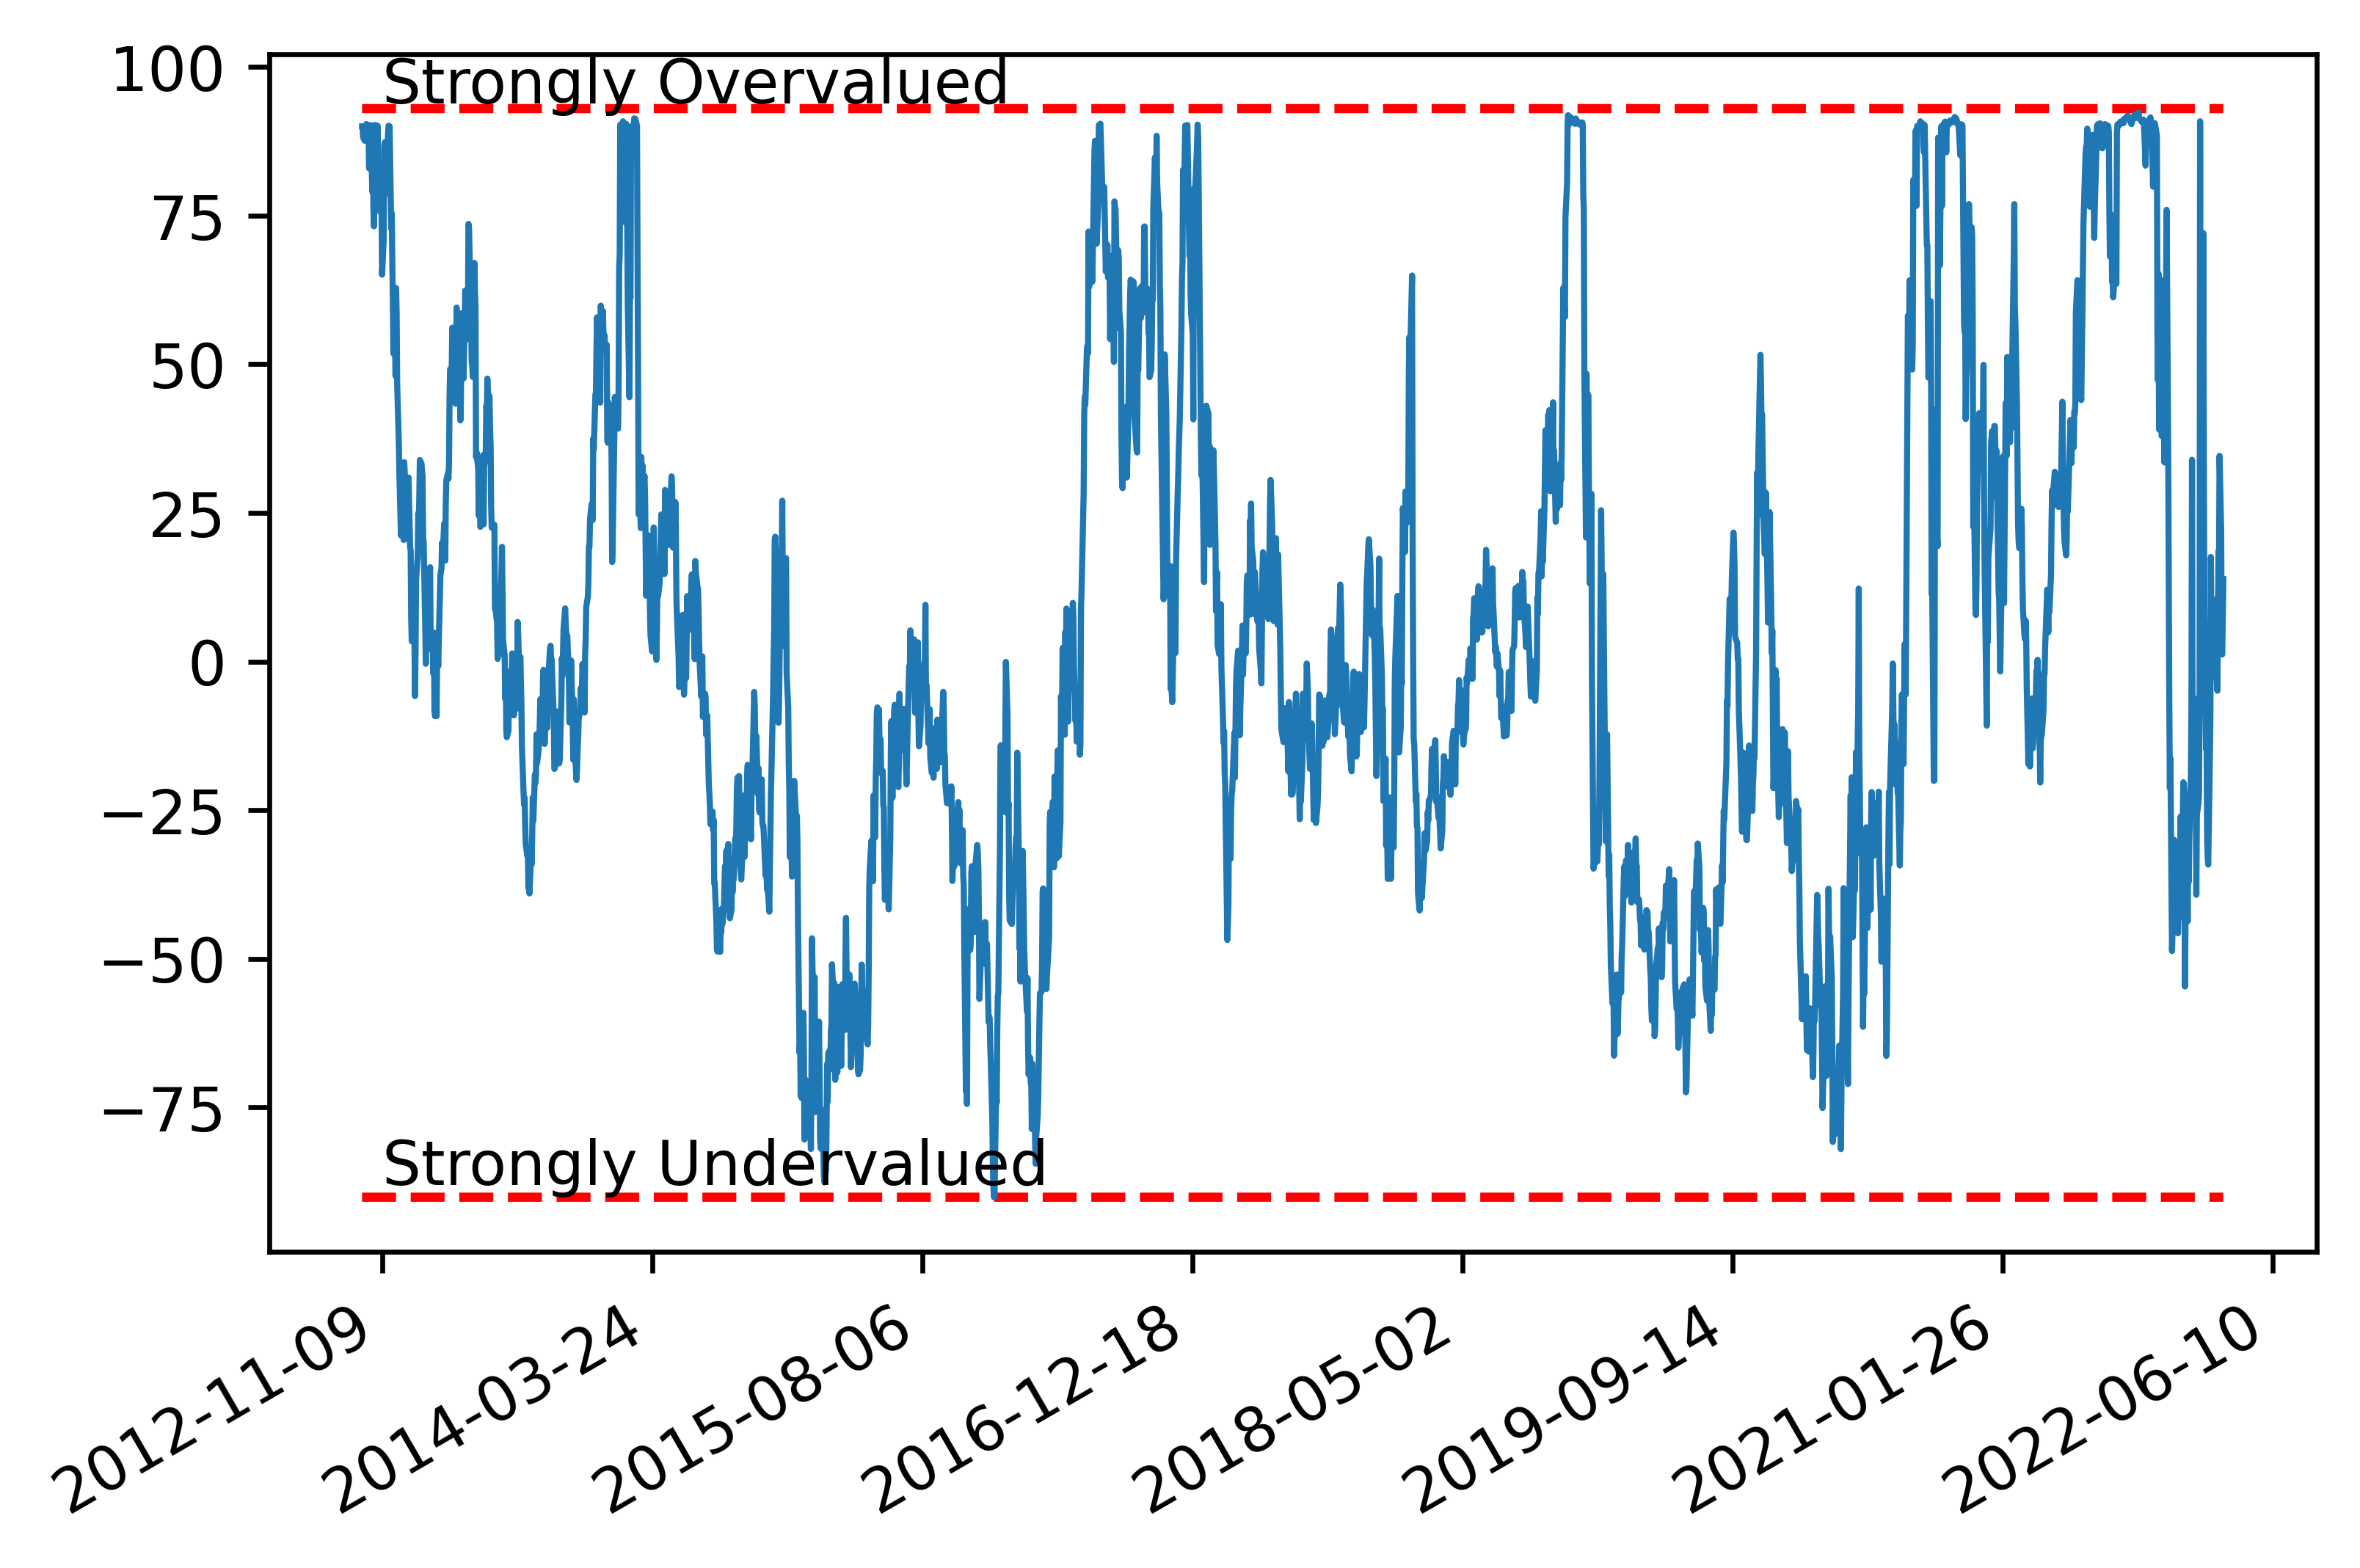

In [ ]:
plt.figure(dpi=600)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.plot(looad['DateTime'][147:], y1[147:], ls='--', c='red')
plt.plot(looad['DateTime'][147:], y[147:], ls='--', c='red')
plt.plot(looad['DateTime'][147:], custom[147:], lw=1)
plt.text(datetime_object, -88, 'Strongly Undervalued', fontsize = 10)
plt.text(datetime_object, 94, 'Strongly Overvalued', fontsize = 10)
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
x = custom[-1]
x

13.854254841127313

In [ ]:
import plotly.graph_objects as go
if -90< x <-50:
  label = "Moderately Undervalued"
elif  -50< x <0:
  label = "Undervalued"
elif  0< x <50:
  label = "Overvalued"
elif  50< x <90:
  label = "Moderately Overvalued"
elif  90< x <100:
  label = "Strongly Overvalued"
elif  -90< x <-100:
  label = "Strongly Undervalued"


fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = x,
    name = label,
    mode = "gauge+number+delta",
    title = {'text': label},
    # delta = {'reference': 380},
    
    gauge = {'axis': {'range': [-100, 100]},
             'steps' : [
                 {'range': [-90, -50], 'color': "lightgray"},
                 {'range': [-50, 0], 'color': "lightgray", 'name': "Undervalued"},
                {'range': [0, 50], 'color': "lightgray", 'name': "Overvalued"},
                {'range': [50, 90], 'color': "lightgray", 'name': "Moderately Overvalued"},
                 {'range': [-100, -90], 'color': "darkred", 'name': "Strongly Undervalued" },
                 {'range': [90, 100], 'color': "darkblue", 'name': "Strongly Overvalued"}],
             }))

fig.show()

In [ ]:
looad.head()

Date  Close    Volume   Open   High    Low  SMA  EMA  MACD   DateTime
0  2012-03-12  2.269   82299.0  2.272  2.289  2.235  0.0  0.0   0.0 2012-03-12
1  2012-03-13  2.299  114622.0  2.270  2.338  2.207  0.0  0.0   0.0 2012-03-13
2  2012-03-14  2.284  120435.0  2.329  2.343  2.248  0.0  0.0   0.0 2012-03-14
3  2012-03-15  2.279  117788.0  2.275  2.331  2.234  0.0  0.0   0.0 2012-03-15
4  2012-03-16  2.326  112037.0  2.267  2.349  2.247  0.0  0.0   0.0 2012-03-16

In [ ]:
looad['SMA']= pd.Series(ma)
looad['EMA']= pd.Series(ema)
looad['MACD']= pd.Series(what)

In [ ]:
looad['Custom Index'] = pd.Series(custom)
looad.head()

Date  Close    Volume   Open   High    Low  SMA  EMA  MACD  \
0  2012-03-12  2.269   82299.0  2.272  2.289  2.235  0.0  0.0   0.0   
1  2012-03-13  2.299  114622.0  2.270  2.338  2.207  0.0  0.0   0.0   
2  2012-03-14  2.284  120435.0  2.329  2.343  2.248  0.0  0.0   0.0   
3  2012-03-15  2.279  117788.0  2.275  2.331  2.234  0.0  0.0   0.0   
4  2012-03-16  2.326  112037.0  2.267  2.349  2.247  0.0  0.0   0.0   

    DateTime  Custom Index  
0 2012-03-12         100.0  
1 2012-03-13         100.0  
2 2012-03-14         100.0  
3 2012-03-15         100.0  
4 2012-03-16         100.0

In [ ]:
looad.to_csv('/content/drive/MyDrive/SIH- Hack Inversion/Coding/data/datav2.csv')

# Indicators Viz Final

## Data preprocess

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SIH- Hack Inversion/Coding/data/initial_nymex_sma_ema_macd.csv')

In [ ]:
data.head(
)

Unnamed: 0        Date  Close    Volume   Open   High    Low       SMA  \
0           0  2022-03-11  4.725   77808.0  4.657  4.797  4.622  2.567271   
1           1  2022-03-10  4.631   75295.0  4.520  4.671  4.499  2.571329   
2           2  2022-03-09  4.526   87262.0  4.569  4.625  4.450  2.575793   
3           3  2022-03-08  4.527  152372.0  4.818  4.882  4.507  2.581071   
4           4  2022-03-07  4.833  125430.0  5.041  5.184  4.781  2.588343   

        EMA      MACD  
0  2.570803 -0.312644  
1  2.575145 -0.314626  
2  2.579119 -0.316987  
3  2.583365 -0.319151  
4  2.587744 -0.321241

In [ ]:
data = data.drop(columns = ['Unnamed: 0'])
data = data.fillna(data.mean())
data.isna().sum()
data=data.reindex(index=data.index[::-1])

In [ ]:
data = data.reset_index()

In [ ]:
data = data.drop(columns = ['index'])

In [ ]:
data.head()

Date  Close    Volume   Open   High    Low  SMA  EMA  MACD
0  2012-03-12  2.269   82299.0  2.272  2.289  2.235  0.0  0.0   0.0
1  2012-03-13  2.299  114622.0  2.270  2.338  2.207  0.0  0.0   0.0
2  2012-03-14  2.284  120435.0  2.329  2.343  2.248  0.0  0.0   0.0
3  2012-03-15  2.279  117788.0  2.275  2.331  2.234  0.0  0.0   0.0
4  2012-03-16  2.326  112037.0  2.267  2.349  2.247  0.0  0.0   0.0

In [ ]:
data.to_csv('/content/drive/MyDrive/SIH- Hack Inversion/Coding/data/nymex_v3.csv')

## SMA

In [ ]:
ma = sma(data['Close'], 21*7)

In [ ]:
len(ma)

2554

In [ ]:
data['DateTime'] =  pd.to_datetime(data['Date'], format='%Y-%m-%d')

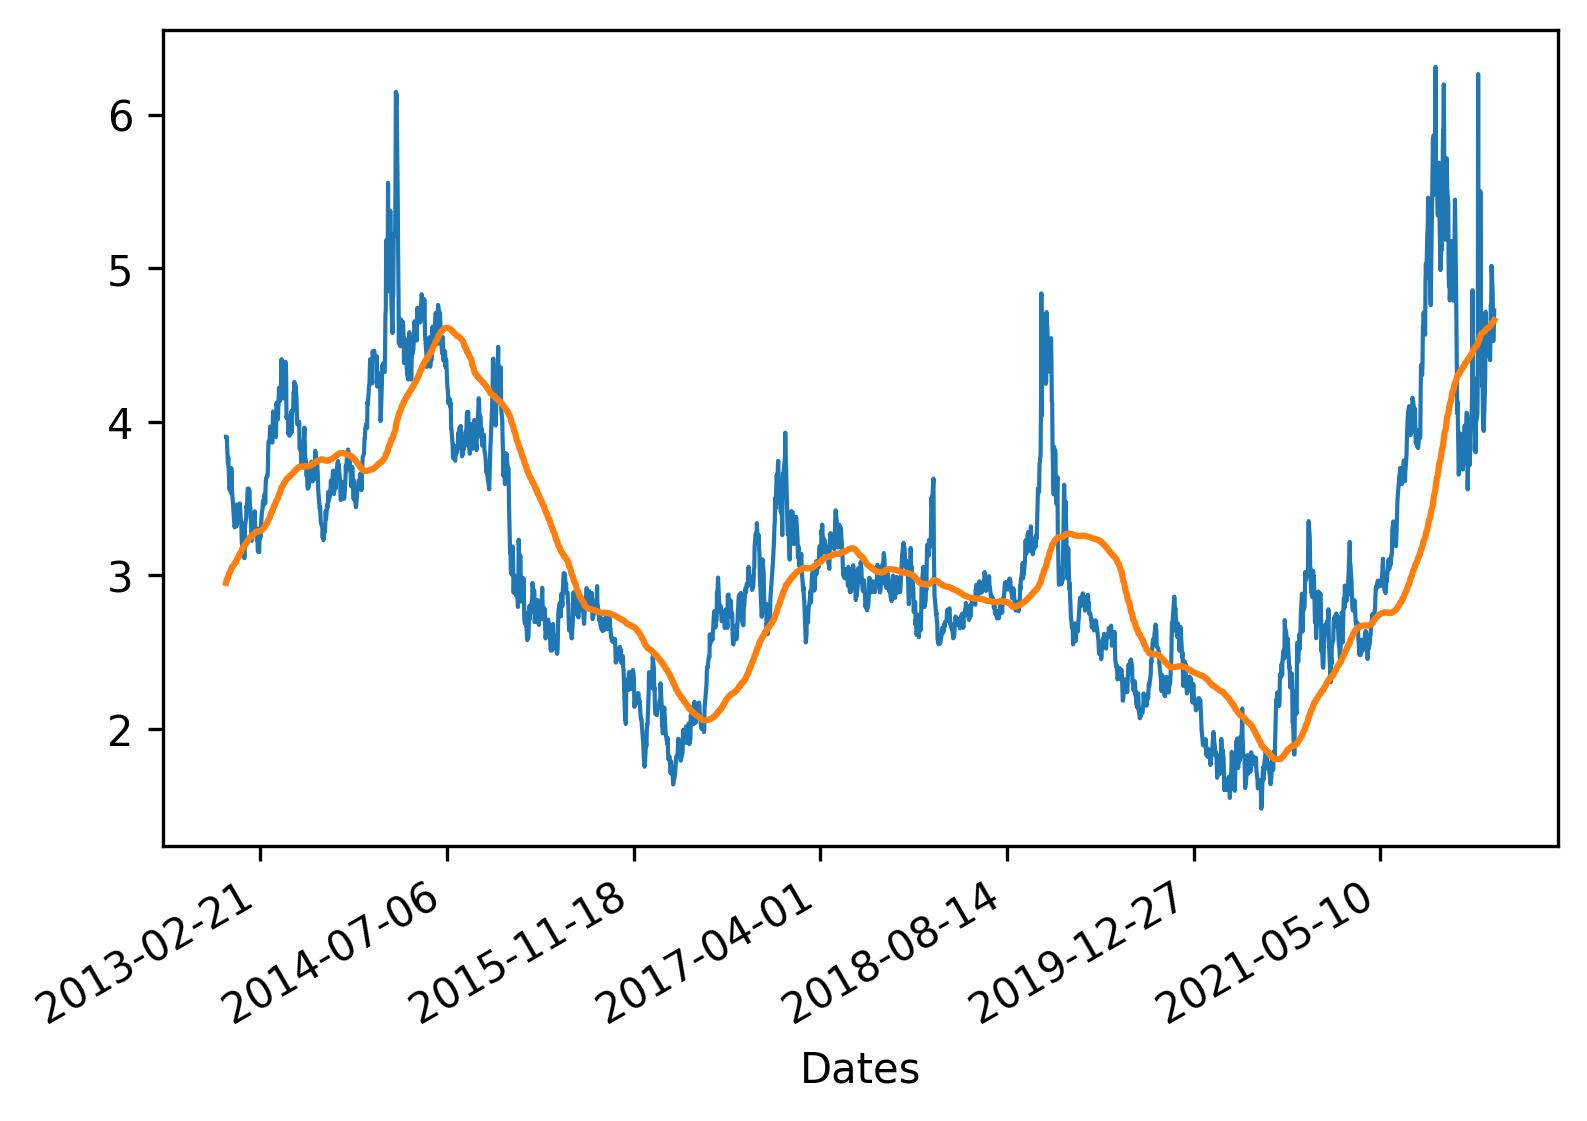

In [ ]:
plt.figure(dpi=300)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.plot(data['DateTime'][182:], data['Close'][182:], lw=1)
plt.plot(data['DateTime'][182:], ma[182:], lw=1.5)
plt.xlabel('Dates')
plt.gcf().autofmt_xdate()
plt.show()

## EMA

In [ ]:
ema = calculate_ema(data['Close'], 21*7)

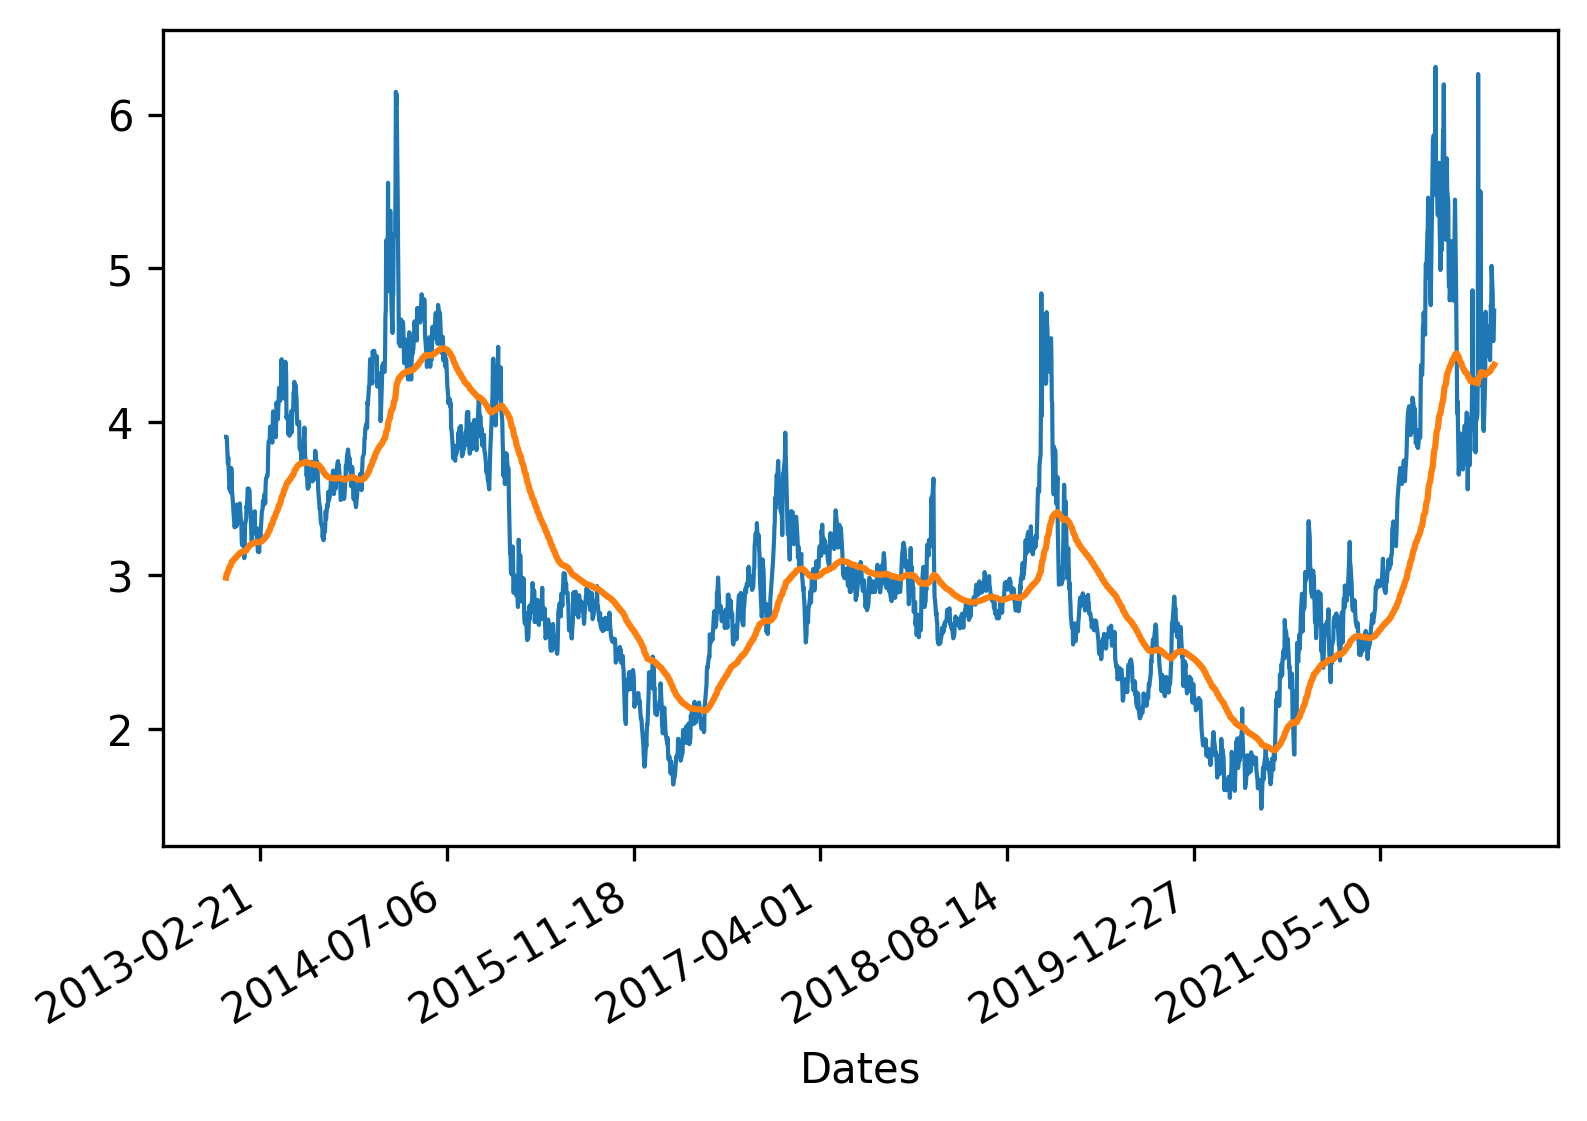

In [ ]:
plt.figure(dpi=300)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
plt.plot(data['DateTime'][182:], data['Close'][182:], lw=1)
plt.plot(data['DateTime'][182:], ema[182:], lw=1.5)
plt.xlabel('Dates')
plt.gcf().autofmt_xdate()
plt.show()

## MACD

In [ ]:
ema1 = calculate_ema(data['Close'], 12*7)
ema2 = calculate_ema(data['Close'], 26*7)
# len(ema1)
what = list()
for i in range(len(ema1)):
  what.append(ema1[i] - ema2[i])

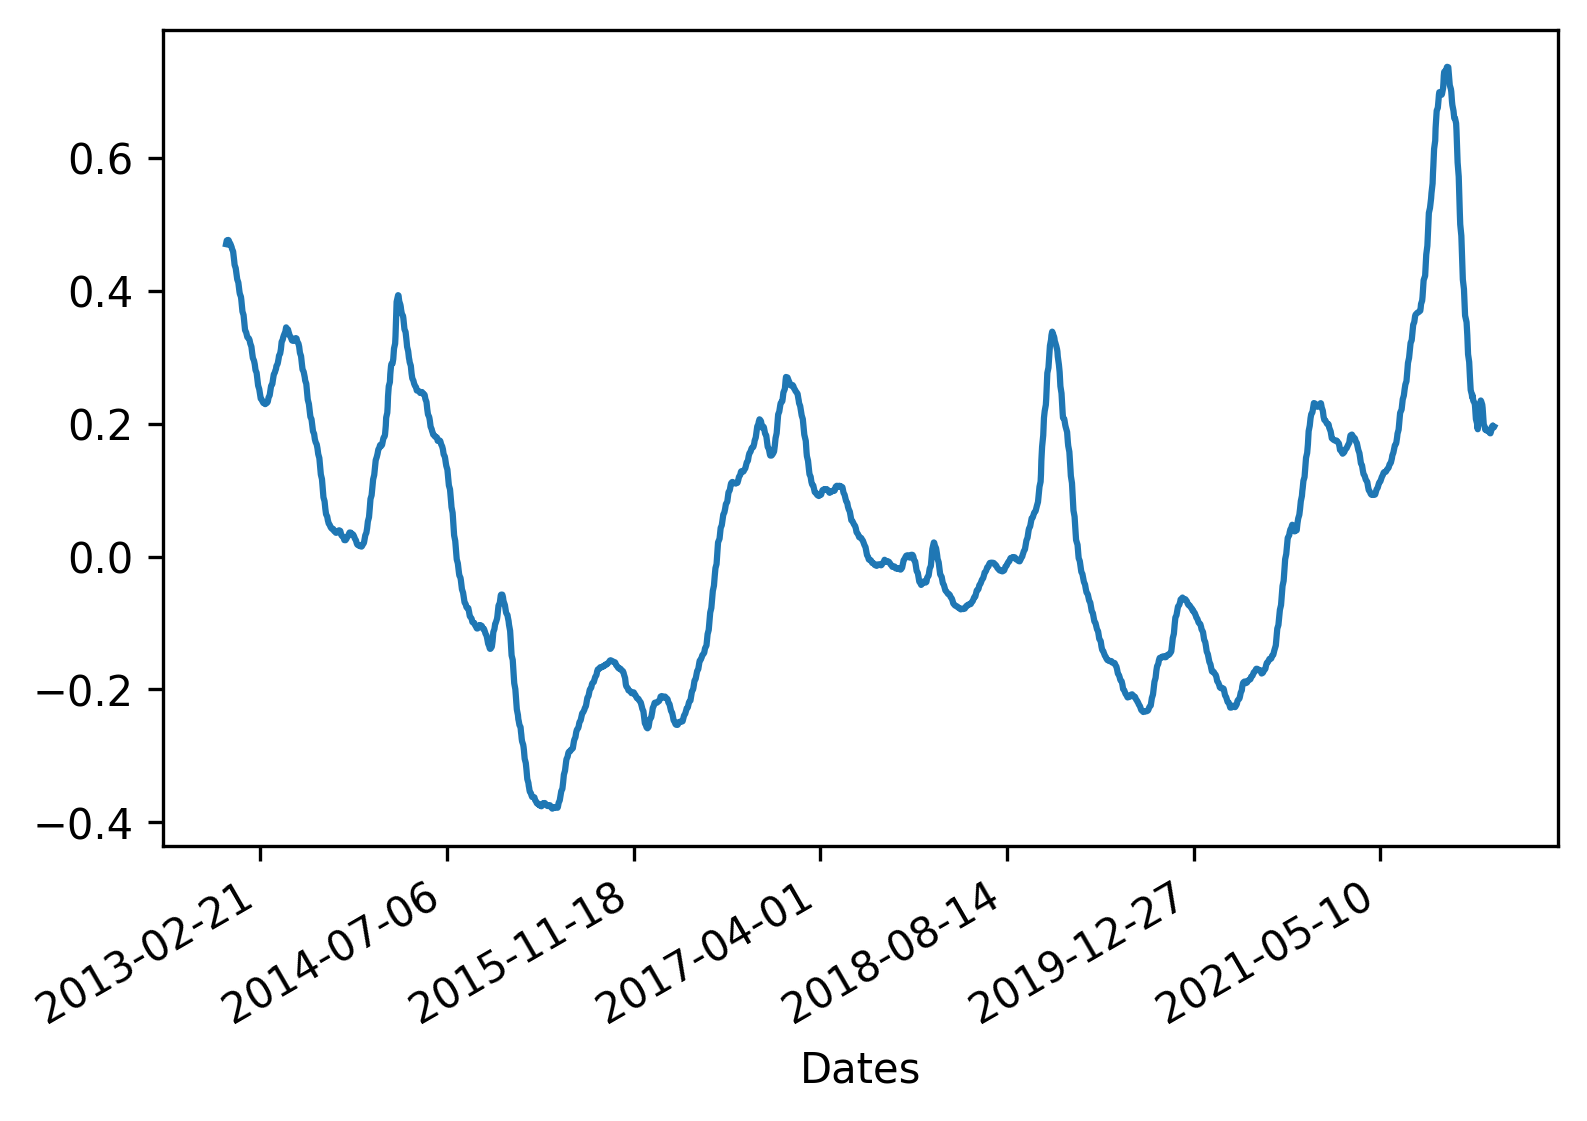

In [ ]:
plt.figure(dpi=300)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
# plt.plot(data['DateTime'][182:], data['Close'][182:], lw=1)
plt.plot(data['DateTime'][182:], what[182:], lw=1.5)
plt.xlabel('Dates')
plt.gcf().autofmt_xdate()
plt.show()

## Custom Index

In [ ]:
u = [sum(x)/2 for x in zip(ma, ema)]

In [ ]:
Kr = 0.3
Kp = 0.9

In [ ]:
custom = list()
for i in range(len(u)):
  P = data['Close'][i]
  if (P > u[i]*(1 - Kr)) and (P < u[i]*(1 + Kr)):

    x = ((P - u[i])*Kp*100)/(u[i]*Kr)

  elif (P < u[i]*(1 - Kr)):

    x = (P*(1 - Kp)/(u[i]*(1 - Kr)) - 1)*100

  else:
    
    x = (1 - (u[i]*(1 + Kr)*(1 - Kp))/P)*100
  custom.append(x)

In [ ]:
len(custom)

2554

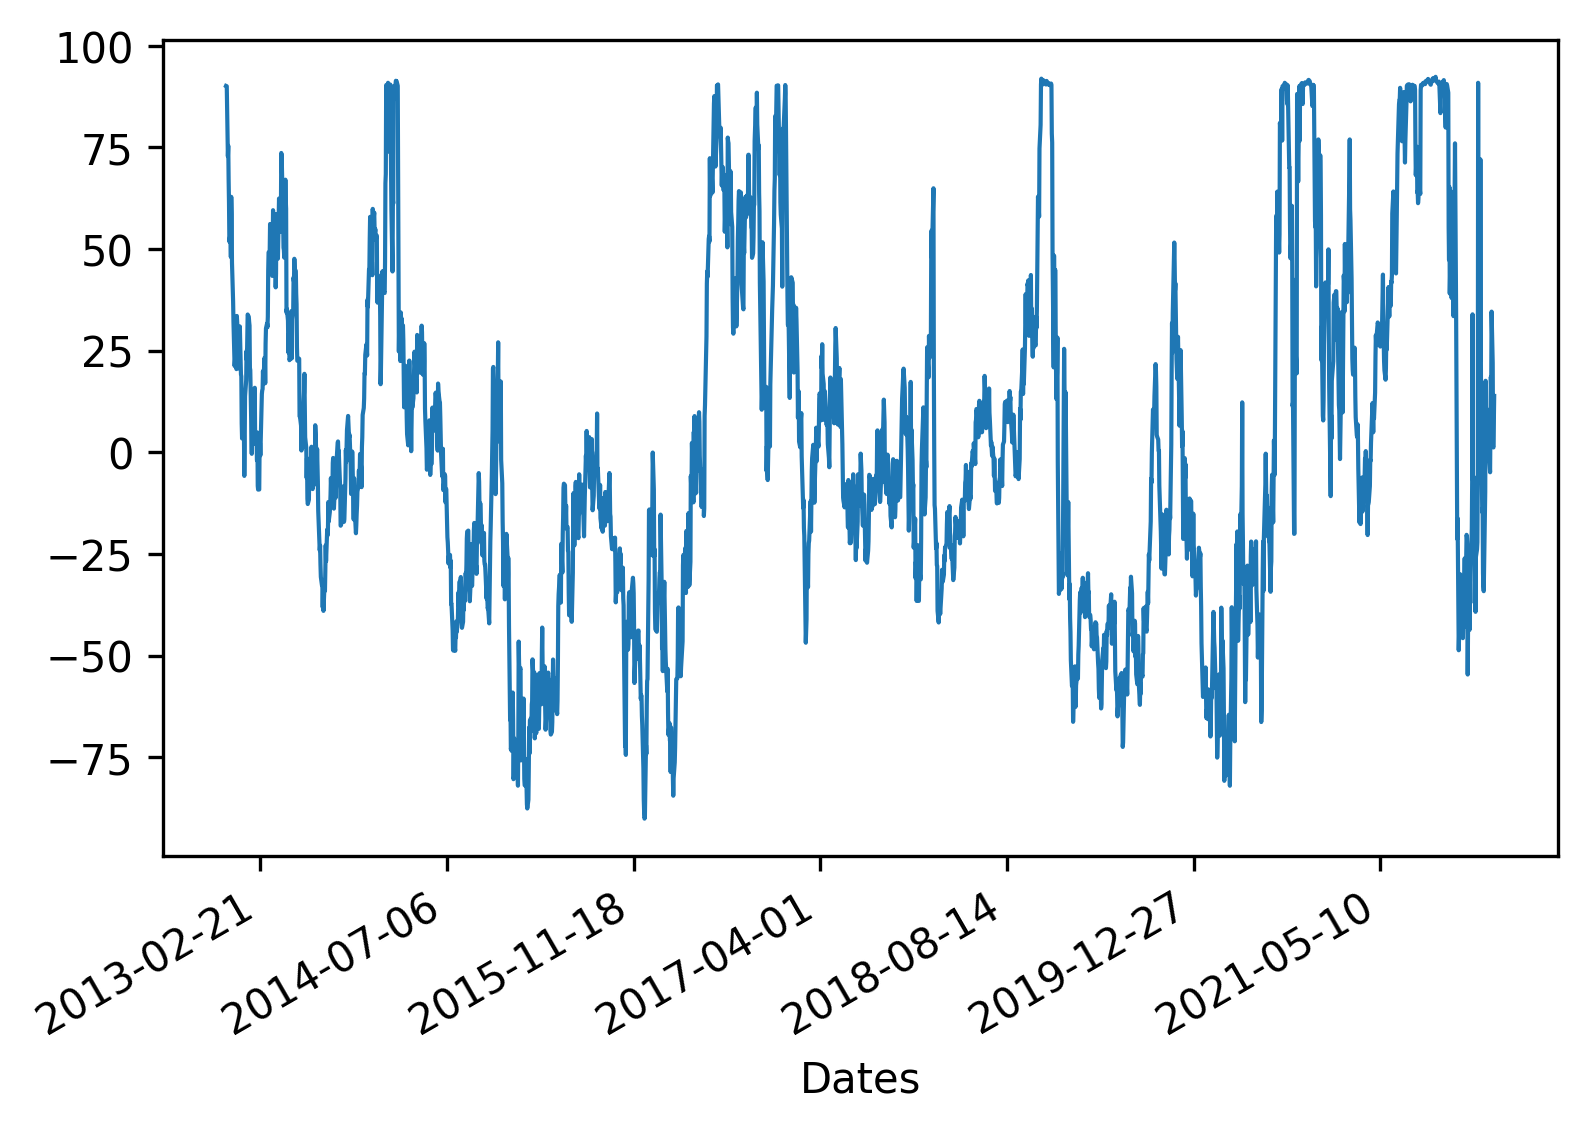

In [ ]:
plt.figure(dpi=300)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=500))
# plt.plot(data['DateTime'][182:], data['Close'][182:], lw=1)
plt.plot(data['DateTime'][182:], custom[182:], lw=1)
plt.xlabel('Dates')
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
data['SMA']= pd.Series(ma)
data['EMA']= pd.Series(ema)
data['MACD']= pd.Series(what)
data['Custom'] = pd.Series(custom)

In [ ]:
data.head()

Date  Close    Volume   Open   High    Low  SMA  EMA  MACD  \
0  2012-03-12  2.269   82299.0  2.272  2.289  2.235  0.0  0.0   0.0   
1  2012-03-13  2.299  114622.0  2.270  2.338  2.207  0.0  0.0   0.0   
2  2012-03-14  2.284  120435.0  2.329  2.343  2.248  0.0  0.0   0.0   
3  2012-03-15  2.279  117788.0  2.275  2.331  2.234  0.0  0.0   0.0   
4  2012-03-16  2.326  112037.0  2.267  2.349  2.247  0.0  0.0   0.0   

    DateTime  Custom  
0 2012-03-12   100.0  
1 2012-03-13   100.0  
2 2012-03-14   100.0  
3 2012-03-15   100.0  
4 2012-03-16   100.0

In [ ]:
data.to_csv('/content/drive/MyDrive/SIH- Hack Inversion/Coding/data/nymex_4ind.csv')